<a href="https://colab.research.google.com/github/rohansejwal-netizen/Price-Prediction/blob/main/empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [138]:
file_path='/content/gurgaon_10k.csv'
gurugram = pd.read_csv(file_path, engine='python', on_bad_lines='skip')


In [139]:
import pandas as pd

file_path='/content/gurgaon_10k.csv'
gurugram = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

main_columns=[
    'PROP_ID',
    'PROPERTY_TYPE',
    'CITY',
    'LOCALITY',
    'BEDROOM_NUM',
    'BATHROOM_NUM',
    'BALCONY_NUM',
    'FURNISH',
    'FACING',
    'AGE',
    'FLOOR_NUM',
    'TOTAL_FLOOR',
    'PRICE_SQFT',
    'GROUP_NAME',
    'AREA',
    'PRICE',
    'SOCIETY_NAME',
    'CLASS_LABEL',
    'OWNTYPE',
    'LISTING',
    'CLASS_HEADING',
    'SECONDARY_TAGS',
    'TOTAL_LANDMARK_COUNT',
    'CONTACT_COMPANY_NAME',
    'LOCALITY_WO_CITY',
    'PRICE_PER_UNIT_AREA'

]
df_small = gurugram[main_columns].copy()
display(df_small.head())

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
0,O71585872,Residential Apartment,Gurgaon,Sector 84 Gurgaon,4.00,4,4.00,4,1,2,...,Alpha Corp GurgaonOne 84,Dealer,1,R,Dealer: propertyline,"['READY TO MOVE', 'RESALE']",10.00,propertyline,Sector 84,8766.00
1,T71585466,Residential Apartment,Gurgaon,Sector 81 Gurgaon,4.00,4,3.00,4,1,1,...,DLF The Ultima,Dealer,1,R,Dealer: MVD AND ASSOCIATES,"['READY TO MOVE', 'RESALE', 'RERA']",9.00,MVD AND ASSOCIATES,Sector 81,21176.00
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3.00,3,2.00,1,4,1,...,Emaar MGF The Palm Drive,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.00,1st Nest Realtors,Sector 66,43.00
3,I71493958,Residential Apartment,Gurgaon,Sector 112 Gurgaon,3.00,3,3.00,4,0,1,...,Experion Windchants,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",8.00,GROW MORE,Sector 112,13740.00
4,H71479412,Residential Apartment,Gurgaon,Sector 104 Gurgaon,3.00,4,4.00,4,6,1,...,ATS Triumph,Dealer,0,R,Dealer: GROW MORE,[],14.00,GROW MORE,Sector 104,17.00


In [140]:
gurugram=df_small

In [141]:
gurugram['LOCALITY_WO_CITY'].isna().sum()


np.int64(0)

In [142]:
gurugram['CONTACT_COMPANY_NAME'].isna().sum()
gurugram.dropna(subset=['CONTACT_COMPANY_NAME'],inplace=True)

In [143]:
gurugram['TOTAL_LANDMARK_COUNT'].isna().sum()
gurugram.dropna(subset=['TOTAL_LANDMARK_COUNT'],inplace=True)

In [144]:
gurugram['SECONDARY_TAGS'].replace('[]',np.nan,inplace=True)

/tmp/ipython-input-3849607050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gurugram['SECONDARY_TAGS'].replace('[]',np.nan,inplace=True)


In [145]:
gurugram['SECONDARY_TAGS'].isna().sum()
gurugram.dropna(subset=['SECONDARY_TAGS'],inplace=True)

In [146]:
gurugram=df_small

In [147]:
gurugram.dropna(subset=['BEDROOM_NUM'],inplace=True)
gurugram.dropna(subset=['BALCONY_NUM'],inplace=True)
gurugram.dropna(subset=['FLOOR_NUM'],inplace=True)
gurugram.dropna(subset=['TOTAL_FLOOR'],inplace=True)
gurugram.dropna(subset=['SOCIETY_NAME'],inplace=True)

In [148]:
gurugram['BEDROOM_NUM']=gurugram['BEDROOM_NUM'].astype(int)

In [149]:
gurugram['BALCONY_NUM']=gurugram['BALCONY_NUM'].astype(int)

In [150]:
gurugram['TOTAL_FLOOR']=gurugram['TOTAL_FLOOR'].astype(int)


In [151]:
gurugram['PRICE_SQFT']=gurugram['PRICE_SQFT'].astype(int)


In [152]:
gurugram[gurugram['TOTAL_FLOOR'] < 10]


,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
9,S69432236,Independent/Builder Floor,Gurgaon,Sector 102 Gurgaon,3,3,3,4,6,1,...,BPTP Amstoria,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",11.00,GROW MORE,Sector 102,72607.00
22,B71337288,Independent/Builder Floor,Gurgaon,Sector 37D Gurgaon,3,3,2,4,4,5,...,Signature Global City,Dealer,1,R,Dealer: 1st Nest Realtors,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",10.00,1st Nest Realtors,Sector 37D,12105.00
43,G71144798,Independent/Builder Floor,Gurgaon,Sector 57 Gurgaon,4,4,2,4,5,6,...,Sector 57,Dealer,1,R,Dealer: OPTUS HOUSING,"['READY TO MOVE', 'RESALE']",45.00,OPTUS HOUSING,Sector 57,96491.00
81,B70932064,Independent/Builder Floor,Gurgaon,Sector 82 Gurgaon,2,2,2,4,3,1,...,Vatika Independent Floors,Dealer,1,R,Dealer: Bliss Consultants,"['READY TO MOVE', 'RESALE']",8.00,Bliss Consultants,Sector 82,44305.00
87,Z70797022,Independent/Builder Floor,Gurgaon,Sector 82 Gurgaon,2,2,2,4,1,1,...,Vatika Independent Floors,Dealer,1,R,Dealer: Bliss Consultants,"['READY TO MOVE', 'RESALE']",8.00,Bliss Consultants,Sector 82,44444.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,N71791096,Residential Apartment,Gurgaon,Sector 82 Gurgaon,4,4,4,1,5,6,...,Vatika Independent Floors,Dealer,1,R,Dealer: Avenue One,"['READY TO MOVE', 'RESALE']",8.00,Avenue One,Sector 82,65155.00
10686,S71785494,Residential Apartment,Gurgaon,Sector 95 Gurgaon,3,3,3,4,5,5,...,Landmark Avana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",11.00,Avenue One,Sector 95,6907.00
10688,Z71785246,Residential Apartment,Gurgaon,Sector 89 Gurgaon,3,3,4,4,5,5,...,Smart World Gems,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",14.00,Avenue One,Sector 89,8924.00
10689,S71785050,Residential Apartment,Gurgaon,Sector 89 Gurgaon,3,3,4,4,5,5,...,M3M Soulitude,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",9.00,Avenue One,Sector 89,9135.00


In [153]:

gurugram['AREA'] = gurugram['AREA'].astype(str).str.extract(r'(\d+)')
gurugram['AREA'] = gurugram['AREA'].astype(float)

In [154]:
gurugram['AREA']=gurugram['AREA'].astype(int)


In [155]:

import re

def convert_price(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()  # remove commas

        # ----- Crores -----
        if 'Cr' in x:
            num = float(re.findall(r'\d+\.?\d*', x)[0])
            return num * 10000000   # 1 Cr = 10,000,000

        # ----- Lakhs -----
        if 'L' in x or 'Lac' in x or 'Lakh' in x:
            num = float(re.findall(r'\d+\.?\d*', x)[0])
            return num * 100000     # 1 Lakh = 100,000

        # ----- Normal Numbers -----
        if x.isnumeric():
            return float(x)

    return None

gurugram['PRICE_NUM'] = gurugram['PRICE'].apply(convert_price)

In [156]:
gurugram.rename(columns={'PRICE_NUM': 'PRICEE'},inplace=True)


In [157]:
gurugram.drop('PRICE',axis=1,inplace=True)


In [158]:
gurugram.dropna(subset=['PRICEE'],inplace=True)


In [159]:
gurugram[gurugram['PRICE_SQFT']<3000]


,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA,PRICEE
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3,3,2,1,4,1,...,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.00,1st Nest Realtors,Sector 66,43.00,85000.00
36,Y71171970,Residential Apartment,Gurgaon,Sector 113 Gurgaon,2,2,3,1,5,6,...,Dealer,0,R,Dealer: Four corners,"['FURNISHED', 'FOR SINGLE MEN', 'FOR SINGLE WO...",9.00,Four corners,Sector 113 Gurgaon,33.00,43500.00
70,E70996706,Residential Apartment,Gurgaon,Sector 62 Gurgaon,4,5,4,4,1,1,...,Dealer,0,R,Dealer: OPTUS HOUSING,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",12.00,OPTUS HOUSING,Sector 62,48.00,150000.00
71,R70996352,Residential Apartment,Gurgaon,Sector 62 Gurgaon,4,6,4,4,1,1,...,Dealer,0,R,Dealer: OPTUS HOUSING,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",11.00,OPTUS HOUSING,Sector 62,32.00,250000.00
72,I70970198,Residential Apartment,Gurgaon,Sector 54 Gurgaon,3,5,3,1,1,3,...,Dealer,0,R,Dealer: OPTUS HOUSING,['FURNISHED'],9.00,OPTUS HOUSING,Sector 54,82.00,238000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,V69976088,Residential Apartment,Gurgaon,Sector 81 Gurgaon,3,2,2,2,3,5,...,Dealer,1,R,Dealer: GLS Consultants,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",8.00,GLS Consultants,Sector 81,2897.00,2289000.00
8661,E71338254,Residential Apartment,Gurgaon,Sector 95 Gurgaon,2,2,1,4,3,1,...,Dealer,1,P,Dealer: Vicky,"['READY TO MOVE', 'RESALE', 'RERA']",3.00,Vicky,Sector 95,2426.00,2378000.00
9827,Q71590308,Residential Apartment,Gurgaon,Sector 107 Gurgaon,2,2,2,4,7,1,...,Dealer,1,R,Dealer: Gupta Property,"['READY TO MOVE', 'RESALE', 'RERA']",3.00,Gupta Property,Sector 107,7.00,4130000.00
9832,A71163604,Residential Apartment,Gurgaon,Sector 107 Gurgaon,2,2,2,2,5,6,...,Dealer,1,R,Dealer: Gupta Property,"['READY TO MOVE', 'RESALE', 'RERA']",3.00,Gupta Property,Sector 107,7.00,4100000.00


In [160]:
gurugram.drop(gurugram[gurugram["PRICEE"]<3000].index,inplace=True)


In [161]:
gurugram.drop(gurugram[gurugram['PRICEE']<7000000].index,inplace=True)


In [162]:
gurugram.drop(gurugram[gurugram["AREA"]>10000].index,inplace=True)


In [163]:
gurugram.drop(gurugram[gurugram['PRICE_SQFT']<3000].index,inplace=True)


In [164]:
gurugram.drop('GROUP_NAME',axis=1,inplace=True)


In [242]:
# Function to calculate outliers using IQR
def count_outliers_iqr(gurugram, column):
    Q1 = gurugram[column].quantile(0.25)
    Q3 = gurugram[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = gurugram[(gurugram[column] < lower_bound) | (gurugram[column] > upper_bound)]
    return len(outliers)

# Count outliers for 'REG_FEE' and 'SALES_PRICE'
outliers_PRICEE = count_outliers_iqr(gurugram, 'PRICEE')
outliers_PRICE_SQFT = count_outliers_iqr(gurugram, 'PRICE_SQFT')
outliers_AREA = count_outliers_iqr(gurugram,'AREA')
outliers_BEDROOM_NUM = count_outliers_iqr(gurugram,'BEDROOM_NUM')
outliers_BATHROOM_NUM = count_outliers_iqr(gurugram,'BATHROOM_NUM')
outliers_BALCONY_NUM = count_outliers_iqr(gurugram,'BALCONY_NUM')

outliers_FURNISH = count_outliers_iqr(gurugram,'FURNISH')
outliers_AGE = count_outliers_iqr(gurugram,'AGE')
outliers_TOTAL_FLOOR = count_outliers_iqr(gurugram,'TOTAL_FLOOR')
# outliers_OWNTYPE = count_outliers_iqr(gurugram,'OWNTYPE')
outliers_TOTAL_LANDMARK_COUNT = count_outliers_iqr(gurugram,'TOTAL_LANDMARK_COUNT')
outliers_PRICE_PER_UNIT_AREA = count_outliers_iqr(gurugram,'PRICE_PER_UNIT_AREA')


print(f"Number of outliers in 'PRICEE': {outliers_PRICEE}")
print(f"Number of outliers in 'PRICE_SQFT': {outliers_PRICE_SQFT}")
print(f"Number of outliers in 'AREA': {outliers_AREA}")
print(f"Number of outliers in 'BEDROOM_NUM': {outliers_BEDROOM_NUM}")
print(f"Number of outliers in 'BATHROOM_NUM': {outliers_BATHROOM_NUM}")
print(f"Number of outliers in 'BALCONY_NUM': {outliers_BALCONY_NUM}")
print(f"Number of outliers in 'FURNISH': {outliers_FURNISH}")
print(f"Number of outliers in 'AGE': {outliers_AGE}")
print(f"Number of outliers in 'TOTAL_FLOOR': {outliers_TOTAL_FLOOR}")
# print(f"Number of outliers in 'OWNTYPE': {outliers_OWNTYPE}")
print(f"Number of outliers in 'TOTAL_LANDMARK_COUNT': {outliers_TOTAL_LANDMARK_COUNT}")
print(f"Number of outliers in 'PRICE_PER_UNIT_AREA': {outliers_PRICE_PER_UNIT_AREA}")

Number of outliers in 'PRICEE': 0
Number of outliers in 'PRICE_SQFT': 0
Number of outliers in 'AREA': 0
Number of outliers in 'BEDROOM_NUM': 0
Number of outliers in 'BATHROOM_NUM': 0
Number of outliers in 'BALCONY_NUM': 0
Number of outliers in 'FURNISH': 0
Number of outliers in 'AGE': 0
Number of outliers in 'TOTAL_FLOOR': 0
Number of outliers in 'TOTAL_LANDMARK_COUNT': 0
Number of outliers in 'PRICE_PER_UNIT_AREA': 0


In [243]:
#Remove outliers for 'FACING' using IQR
Q1_FACING = gurugram['FACING'].quantile(0.25)
Q3_FACING = gurugram['FACING'].quantile(0.75)
IQR_FACING = Q3_FACING - Q1_FACING
lower_bound_FACING = Q1_FACING - 1.5 * IQR_FACING
upper_bound_FACING = Q3_FACING + 1.5 * IQR_FACING

gurugram = gurugram [(gurugram['FACING'] >= lower_bound_FACING) & (gurugram['FACING'] <= upper_bound_FACING)]

# Verify the number of outliers in 'FACING' after removal

outliers_FACING_cleaned = count_outliers_iqr(gurugram,'FACING')

print(f"Number of outliers in 'FACING' after removal: {outliers_FACING_cleaned}")

Number of outliers in 'FACING' after removal: 0


In [244]:
#Remove outliers for "BALCONY_NUM" using IQR
Q1_BALCONY_NUM = gurugram['BALCONY_NUM'].quantile(0.25)
Q3_BALCONY_NUM = gurugram['BALCONY_NUM'].quantile(0.75)
IQR_BALCONY_NUM = Q3_BALCONY_NUM - Q1_BALCONY_NUM
lower_bound_BALCONY_NUM = Q1_BALCONY_NUM - 1.5 * IQR_BALCONY_NUM
upper_bound_BALCONY_NUM = Q3_BALCONY_NUM + 1.5 * IQR_BALCONY_NUM

gurugram = gurugram[(gurugram['BALCONY_NUM'] >= lower_bound_BALCONY_NUM) & (gurugram['BALCONY_NUM'] <= upper_bound_BALCONY_NUM)]

# Verify the number of outliers in 'BALCONY_NUM' after removal

OUTLIERS_BALCONY_NUM_CLEANED = count_outliers_iqr(gurugram,'BALCONY_NUM')

print(f"Number of outliers in 'BALCONY_NUM' after removal : {OUTLIERS_BALCONY_NUM_CLEANED}")

Number of outliers in 'BALCONY_NUM' after removal : 0


In [245]:
#Remove outliers for 'TOTAL_LANDMARK_COUNT' using IQR

Q1_TOTAL_LANDMARK_COUNT = gurugram['TOTAL_LANDMARK_COUNT'].quantile(0.25)
Q3_TOTAL_LANDMARK_COUNT = gurugram['TOTAL_LANDMARK_COUNT'].quantile(0.75)
IQR_TOTAL_LANDMARK_COUNT = Q3_TOTAL_LANDMARK_COUNT - Q1_TOTAL_LANDMARK_COUNT
lower_bound_TOTAL_LANDMARK_COUNT = Q1_TOTAL_LANDMARK_COUNT - 1.5 * IQR_TOTAL_LANDMARK_COUNT
upper_bound_TOTAL_LANDMARK_COUNT = Q3_TOTAL_LANDMARK_COUNT + 1.5 * IQR_TOTAL_LANDMARK_COUNT

gurugram = gurugram[(gurugram['TOTAL_LANDMARK_COUNT'] >= lower_bound_TOTAL_LANDMARK_COUNT) & (gurugram['TOTAL_LANDMARK_COUNT'] <= upper_bound_TOTAL_LANDMARK_COUNT)]

# Verify the number of outliers in 'TOTAL_LANDMARK_COUNT'after removal

outliers_TOTAL_LANDMARK_COUNT_removed = count_outliers_iqr(gurugram,'TOTAL_LANDMARK_COUNT')

print(f"Number of outliers in 'TOTAL_LANDMARK_COUNT' after removal: {outliers_TOTAL_LANDMARK_COUNT}")


Number of outliers in 'TOTAL_LANDMARK_COUNT' after removal: 0


In [246]:
#Remove outliers for 'BEDROOM_NUM' using IQR
Q1_BEDROOM_NUM = gurugram['BEDROOM_NUM'].quantile(0.25)
Q3_BEDROOM_NUM = gurugram['BEDROOM_NUM'].quantile(0.75)
IQR_BEDROOM_NUM = Q3_BEDROOM_NUM - Q1_BEDROOM_NUM
lower_bound_BEDROOM_NUM = Q1_BEDROOM_NUM - 1.5 * IQR_BEDROOM_NUM
upper_bound_BEDROOM_NUM = Q3_BEDROOM_NUM + 1.5 * IQR_BEDROOM_NUM

gurugram = gurugram[(gurugram['BEDROOM_NUM'] >= lower_bound_BEDROOM_NUM) & (gurugram['BEDROOM_NUM'] <= upper_bound_BEDROOM_NUM)]

# Verify the number of outliers in 'BEDROOM_NUM' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'BEDROOM_NUM')


print(f"Number of outrliers in 'BEDROOM_NUM' after removal: {outliers_gurugram_cleaned}")

Number of outrliers in 'BEDROOM_NUM' after removal: 0


In [247]:
#Remove outlier for "TOTAL_FLOOR" using IQR

Q1_TOTAL_FLOOR = gurugram['TOTAL_FLOOR'].quantile(0.25)
Q3_TOTAL_FLOOR = gurugram['TOTAL_FLOOR'].quantile(0.75)
IQR_TOTAL_FLOOR = Q3_TOTAL_FLOOR - Q1_TOTAL_FLOOR
lower_bound_TOTAL_FLOOR = Q1_TOTAL_FLOOR - 1.5 * IQR_TOTAL_FLOOR
upper_bound_TOTAL_FLOOR = Q3_TOTAL_FLOOR + 1.5 * IQR_TOTAL_FLOOR

gurugram = gurugram[(gurugram["TOTAL_FLOOR"] >= lower_bound_TOTAL_FLOOR) & (gurugram["TOTAL_FLOOR"] <= upper_bound_TOTAL_FLOOR)]


# Verify the number of outliers in 'TOTAL_FLOOR' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'TOTAL_FLOOR')

print(f"Number of outliers in 'TOTAL_FLOOR' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'TOTAL_FLOOR' after removal: 0


In [248]:
# Remove outliers for 'OWNTYPE' suing IQR

Q1_OWNTYPE = gurugram['OWNTYPE'].quantile(0.25)
Q3_OWNTYPE = gurugram['OWNTYPE'].quantile(0.75)
IQR_OWNTYPE = Q3_OWNTYPE - Q1_OWNTYPE
lower_bound_OWNTYPE = Q1_OWNTYPE - 1.5 * IQR_OWNTYPE
upper_bound_OWNTYPE = Q3_OWNTYPE + 1.5 * IQR_OWNTYPE


gurugram = gurugram[(gurugram['OWNTYPE'] >= lower_bound_OWNTYPE) & (gurugram["OWNTYPE"] <= upper_bound_OWNTYPE)]

#Verify the number of outliers in 'OWNTYPE' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'OWNTYPE')

print(f"Number of outliers in 'OWNTYPE' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'OWNTYPE' after removal: 0


In [249]:
#Remove outliers for 'BATHROOM_NUM' using IQR

Q1_BATHROOM_NUM = gurugram['BATHROOM_NUM'].quantile(0.25)
Q3_BATHROOM_NUM = gurugram["BATHROOM_NUM"].quantile(0.75)
IQR_BATHROOM_NUM = Q3_BATHROOM_NUM - Q1_BATHROOM_NUM
lower_bound_BATHROOM_NUM = Q1_BATHROOM_NUM - 1.5 * IQR_BATHROOM_NUM
upper_bound_BATHROOM_NUM = Q3_BATHROOM_NUM + 1.5 * IQR_BATHROOM_NUM

gurugram = gurugram[(gurugram['BATHROOM_NUM'] >= lower_bound_BATHROOM_NUM) & (gurugram['BATHROOM_NUM'] <= upper_bound_BATHROOM_NUM)]

# Verfiy the number of outliers in 'BATHROOM_NUM' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'BATHROOM_NUM')

print(f"Number of outliers in 'BATHROOM_NUM' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'BATHROOM_NUM' after removal: 0


In [250]:
# Remove outliers for 'Price' using IQR
Q1_PRICEE = gurugram['PRICE_SQFT'].quantile(0.25)
Q3_PRICEE= gurugram['PRICE_SQFT'].quantile(0.75)

IQR_PRICEE = Q3_PRICEE - Q1_PRICEE
lower_bound_PRICEE = Q1_PRICEE - 1.5 * IQR_PRICEE
upper_bound_PRICEE = Q3_PRICEE + 1.5 * IQR_PRICEE


gurugram = gurugram[(gurugram['PRICE_SQFT'] >= lower_bound_PRICEE) & (gurugram['PRICE_SQFT'] <= upper_bound_PRICEE)]

# Verify the number of outliers in 'Price' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'PRICE_SQFT')


print(f"Number of outliers in 'PRICE_SQFT' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'PRICE_SQFT' after removal: 0


In [251]:
# Remove outliers for 'Price' using IQR
Q1_PRICEE = gurugram['PRICEE'].quantile(0.25)
Q3_PRICEE= gurugram['PRICEE'].quantile(0.75)
IQR_PRICEE = Q3_PRICEE - Q1_PRICEE
lower_bound_PRICEE = Q1_PRICEE - 1.5 * IQR_PRICEE
upper_bound_PRICEE = Q3_PRICEE + 1.5 * IQR_PRICEE

gurugram = gurugram[(gurugram['PRICEE'] >= lower_bound_PRICEE) & (gurugram['PRICEE'] <= upper_bound_PRICEE)]

# Verify the number of outliers in 'Price' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'PRICEE')

print(f"Number of outliers in 'PRICEE' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'PRICEE' after removal: 0


In [252]:
#Remove outliers in 'AREA' using IQR
Q1_AREA = gurugram['AREA'].quantile(0.25)
Q3_AREA = gurugram['AREA'].quantile(0.75)

IQR_AREA = Q3_AREA - Q1_AREA
lower_bound_AREA = Q1_AREA - 1.5 * IQR_AREA
upper_bound_AREA = Q3_AREA + 1.5 * IQR_AREA

gurugram = gurugram[(gurugram['AREA'] >= lower_bound_AREA) & (gurugram['AREA'] <= upper_bound_AREA)]

#verify the number of outliers in 'AREA' after removal


outliers_AREA_cleaned = count_outliers_iqr(gurugram,'AREA')

print(f"number of outliers in 'AREA' after removal: {outliers_AREA_cleaned}")

number of outliers in 'AREA' after removal: 0


In [253]:
gurugram['PRICEE'].max()

35100000.0

In [254]:
gurugram['FLOOR_NUM'].replace('G',0,inplace=True)
gurugram['FLOOR_NUM'].replace('L',-1,inplace=True)

/tmp/ipython-input-3408776166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gurugram['FLOOR_NUM'].replace('G',0,inplace=True)
/tmp/ipython-input-3408776166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [255]:
gurugram['FLOOR_NUM'] = gurugram['FLOOR_NUM'].astype(int)


In [256]:
import pandas as pd
import numpy as np

# Select only numerical columns for correlation matrix
numerical_cols = gurugram.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = gurugram[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

                      BEDROOM_NUM  BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  \
BEDROOM_NUM                   NaN           NaN          NaN      NaN     NaN   
BATHROOM_NUM                  NaN          1.00         0.16     0.02    0.01   
BALCONY_NUM                   NaN          0.16         1.00    -0.02    0.07   
FURNISH                       NaN          0.02        -0.02     1.00    0.10   
FACING                        NaN          0.01         0.07     0.10    1.00   
AGE                           NaN         -0.17        -0.09    -0.05    0.01   
FLOOR_NUM                     NaN          0.14         0.13    -0.05    0.03   
TOTAL_FLOOR                   NaN          0.14         0.18    -0.04    0.02   
PRICE_SQFT                    NaN          0.04        -0.05     0.10    0.03   
AREA                          NaN          0.51         0.19     0.03   -0.00   
OWNTYPE                       NaN           NaN          NaN      NaN     NaN   
TOTAL_LANDMARK_COUNT        

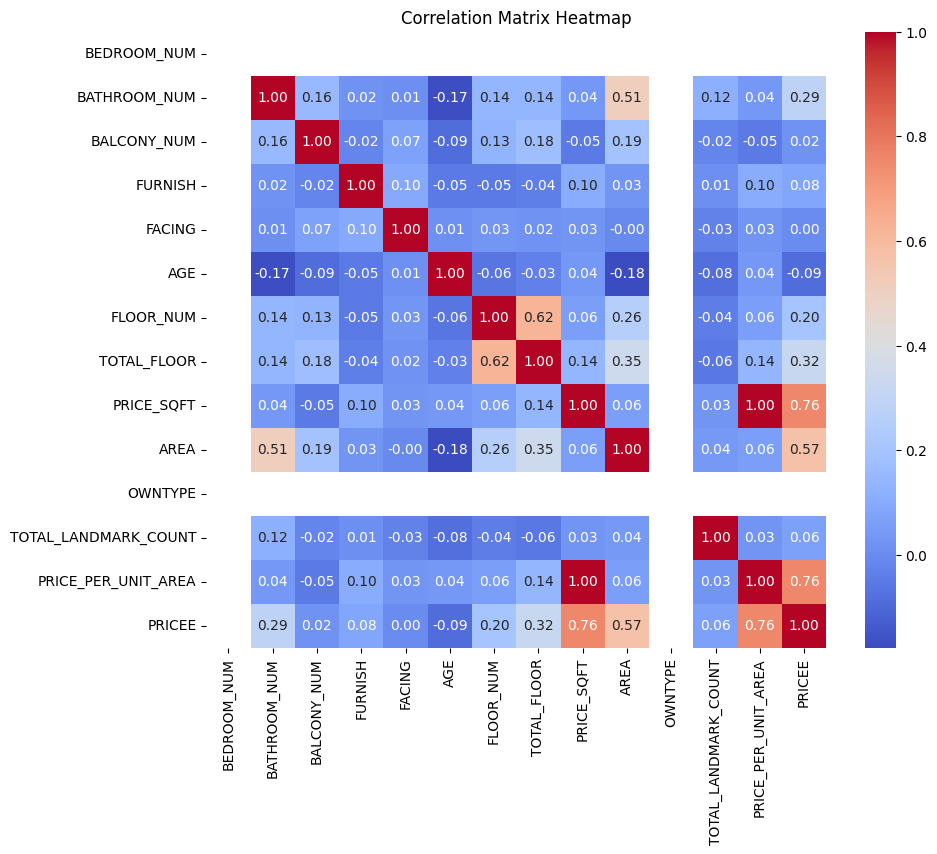

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [258]:
gurugram.rename(columns={'PROP_ID':'ID'},inplace=True)


In [259]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
gurugram['ID'] = le.fit_transform(gurugram['ID'])

In [260]:
gurugram.drop('OWNTYPE',axis=1,inplace=True)


In [261]:
gurugram_80, gurugram_20=train_test_split(gurugram,test_size=0.2,random_state=42)
gurugram_20.to_csv('gurugram_price',index=False)

In [262]:
gurugram_80.drop('PRICE_SQFT',axis=1,inplace=True)


In [263]:
gurugram_80.to_csv('gurugram_80',index=False)


In [264]:
gurugram_20.drop(['PRICE_SQFT','PRICEE'],axis=1,inplace=True)


In [265]:
gurugram_20.to_csv('gurugram_20',index=False)


In [266]:
%pip install catboost

In [267]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/gurugram_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Separate features and target
X = df.drop(['PRICEE','PRICE_PER_UNIT_AREA','ID','CITY','FLOOR_NUM','CLASS_LABEL'], axis=1)
y = df['PRICEE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Fill NaN values in categorical columns with a placeholder
for col in cat_features:
    X[col] = X[col].fillna('Unknown')


# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model

model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.05,
    depth=7,
    loss_function='RMSE', # RMSE is suitable for log-transformed target
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_main_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['PROPERTY_TYPE', 'LOCALITY', 'SOCIETY_NAME', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY']
0:	learn: 6113393.5374715	total: 8.39ms	remaining: 41.9s
200:	learn: 2086492.8473990	total: 1.49s	remaining: 35.6s
400:	learn: 1630791.9245147	total: 2.97s	remaining: 34.1s
600:	learn: 1335936.2475180	total: 4.56s	remaining: 33.4s
800:	learn: 1103843.4900351	total: 6.12s	remaining: 32.1s
1000:	learn: 946027.1338654	total: 7.68s	remaining: 30.7s
1200:	learn: 832309.3181082	total: 9.22s	remaining: 29.2s
1400:	learn: 727074.1102871	total: 12s	remaining: 30.8s
1600:	learn: 644359.5230777	total: 13.8s	remaining: 29.2s
1800:	learn: 574353.2186027	total: 15.3s	remaining: 27.2s
2000:	learn: 520103.6751827	total: 16.8s	remaining: 25.2s
2200:	learn: 473663.4812190	total: 18.3s	remaining: 23.3s
2400:	learn: 432042.0858308	total: 19.9s	remaining: 21.5s
2600:	learn: 396524.8838025	total: 21.4s	remaining: 19.7s
2800:	learn: 365882.0816184	total

In [268]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/gurugram_80'
test_path = '/content/gurugram_20'
model_path = '/content/catboost_main_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c != 'PRICEE']

# Detect categorical columns from training data
cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_Price'] = predictions

# Save new CSV with predictions
output_path = '/content/gurugram_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_Price']].head())




Categorical features: ['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY']
✅ Prediction complete! File saved as: /content/gurugram_20_with_predicted_price.csv


,PREDICTED_Price
0,22010543.69
1,12019601.23
2,15330048.37
3,21413386.81
4,21188647.03


In [269]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/gurugram_20_with_predicted_price.csv'
actual_path = '/content/gurugram_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['ID', 'PREDICTED_Price']], on='ID', how='inner')

# Calculate metrics
r2 = r2_score(combined['PRICEE'], combined['PREDICTED_Price'])
rmse = np.sqrt(mean_squared_error(combined['PRICEE'], combined['PREDICTED_Price']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['PRICEE', 'PREDICTED_Price']].head(10)
print("\nSample comparison:")
print(comparison)






R-squared (Accuracy): 0.8890
Root Mean Squared Error (RMSE): 2,118,340.85

Sample comparison:
       PRICEE  PREDICTED_Price
0 20600000.00      22010543.69
1 10500000.00      12019601.23
2 14500000.00      15330048.37
3 20000000.00      21413386.81
4 21500000.00      21188647.03
5 35000000.00      33263532.26
6 12500000.00      14218966.46
7 15100000.00      15135812.04
8 11800000.00      13135190.92
9 17000000.00      18020012.26


In [270]:
# gurugram.drop('PRICE_PER_UNIT_AREA',axis=1,inplace=True)
gurugram.to_csv('gurugram_new',index=False)

In [271]:
file_path='/content/gurugram_new'
gurugramm = pd.read_csv(file_path)

In [272]:
gurugramm['PRICEE'].max()


35100000.0

In [273]:
gurugramm['PRICEE'].min()


7000000.0

In [274]:
gurugramm['PRICEE'].mean()


np.float64(18523034.184514005)

In [275]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
# If your file is gurugram_new.csv, change accordingly
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

cols_to_remove = [
    'PRICE_SQFT',
    'PRICE_PER_UNIT_AREA',
    'AGE',
    'FURNISH',
    'TOTAL_LANDMARK_COUNT',
    'BEDROOM_NUM',
    'CONTACT_COMPANY_NAME',
    'SECONDARY_TAGS',
    'CLASS_HEADING'


]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed leakage column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
# Drop exact duplicates (if any)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Ensure PRICEE is numeric
df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')

# Drop rows where PRICEE is missing or <= 0
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)


# ==========================================
# 4. Feature engineering
# ==========================================



# 4.2 Log-transform target (THIS is what reduces RMSE)
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

# ==========================================
# 5. Outlier removal (multi-column)
# ==========================================

def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

for c in ['PRICEE', 'PRICE_SQFT', 'AREA']:
    if c in df.columns:
        before = df.shape[0]
        df = rm_outliers_iqr(df, c)
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {c}")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 6. Location clustering from LOCALITY_WO_CITY
#    (uses simple bag-of-words on locality name)
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)

    vec = CountVectorizer(min_df=5)  # ignore super-rare names
    X_loc = vec.fit_transform(loc_text)

    # choose number of clusters (you can tweak 15–30)
    kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    # fallback if column not present
    df['loc_cluster'] = 0

# ==========================================
# 7. Society-level target encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')
else:
    df['society_mean_price'] = df['PRICEE'].mean()
    df['society_count'] = 1

# Fill any remaining NaNs in engineered columns
for col in ['loc_cluster', 'society_mean_price', 'society_count']:
    df[col] = df[col].fillna(df[col].median())

# ==========================================
# 8. Select features & target
# ==========================================

target = 'LOG_PRICE'

# Columns we definitely don't want as features
drop_cols = [
    'ID',
    'PRICEE',        # raw target (we'll predict log and convert back)
    'LOG_PRICE',
    # anything obviously useless for prediction:
    'CONTACT_COMPANY_NAME',
]

# also drop text columns that are too messy for now
for col in ['CLASS_HEADING', 'SECONDARY_TAGS']:
    if col in df.columns:
        drop_cols.append(col)

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))
print("Features:", feature_cols)

# ==========================================
# 9. Identify categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# CatBoost needs indices of categorical columns
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 10. Stratified train–test split using price bins
# ==========================================
# Create bins on PRICEE for more balanced split on expensive/cheap properties
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==========================================
# 11. CatBoost model (tuned configuration)
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=5000,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=3,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=1.5,
    od_wait=72,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluation (R² and RMSE on original PRICE scale)
# ==========================================
# Predict log-price
y_pred_log = model.predict(test_pool)

# Convert back to actual price
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Save predictions with actuals for inspection
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.sort_values('ABS_ERROR', ascending=False).head(20)

# Save to CSV to download from Colab
results.to_csv('gurugram_test_with_predictions.csv', index=False)
print("Saved: gurugram_test_with_predictions.csv")


Shape before cleaning: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini T

In [301]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

# ==========================================
# 2A. Remove known bad / leakage / noisy columns
# ==========================================
# IMPORTANT: we do NOT remove AGE / BEDROOM_NUM / FURNISH now (they are useful)
cols_to_remove = [
    'PRICE_SQFT',           # leakage
    'PRICE_PER_UNIT_AREA',  # leakage
    'society_price_rank'
]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
# Drop exact duplicates (if any)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Ensure PRICEE is numeric
df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')

# Drop rows where PRICEE is missing or <= 0
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)

# ==========================================
# 4. Feature engineering (basic)
# ==========================================

# 4.1 Log-transform target (reduces RMSE)
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

# 4.2 Area-based features (non-linear)
if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA'] ** 2

# 4.3 Floor ratio feature
if 'FLOOR_NUM' in df.columns and 'TOTAL_FLOOR' in df.columns:
    df['floor_ratio'] = df['FLOOR_NUM'] / (df['TOTAL_FLOOR'].replace(0, np.nan) + 1)
    df['floor_ratio'] = df['floor_ratio'].fillna(df['floor_ratio'].median())

# ==========================================
# 5. Outlier removal (multi-column)
# ==========================================

def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

for c in ['PRICEE', 'AREA']:
    if c in df.columns:
        before = df.shape[0]
        df = rm_outliers_iqr(df, c)
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {c}")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 6. Location clustering (TF-IDF + KMeans)
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)

    # TF-IDF with unigrams + bigrams for better locality representation
    vec = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
    X_loc = vec.fit_transform(loc_text)

    # You can tweak n_clusters (e.g., 25–35)
    kmeans = KMeans(n_clusters=30, random_state=42, n_init=20)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    df['loc_cluster'] = 0

# ==========================================
# 7. Society-level target encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')

    # Rank societies by average price (premium vs budget)
    soc_mean = df.groupby('SOCIETY_NAME')['PRICEE'].mean()
    soc_rank = soc_mean.rank(method='dense')
    df['society_price_rank'] = df['SOCIETY_NAME'].map(soc_rank)
else:
    df['society_mean_price'] = df['PRICEE'].mean()
    df['society_count'] = 1
    df['society_price_rank'] = 1

# Fill NaNs in engineered numeric columns
for col in ['loc_cluster', 'society_mean_price', 'society_count', 'society_price_rank', 'AREA_LOG', 'AREA_SQ']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ==========================================
# 8. Select features & target
# ==========================================

target = 'LOG_PRICE'

# Columns we definitely don't want as features
drop_cols = [
    'ID',          # identifier
    'PRICEE',      # raw target
    'LOG_PRICE',   # log target
    'society_price_rank'
]

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))
print("Features:", feature_cols)

# ==========================================
# 9. Identify categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 10. Stratified train–test split using price bins
# ==========================================
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==========================================
# 11. CatBoost model (improved tuning)
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=5000,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=3,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=1.5,
    od_wait=70,
    verbose=200
)


model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluation (R² and RMSE on original PRICE scale)
# ==========================================
y_pred_log = model.predict(test_pool)

# Convert back to actual price
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS (IMPROVED MODEL) ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Save predictions with actuals for inspection
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.to_csv('gurugram_test_with_predictions_improved.csv', index=False)
print("Saved: gurugram_test_with_predictions_improved.csv")


Shape before cleaning: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini T

In [302]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

# ==========================================
# 2A. Remove leakage / bad columns
# ==========================================
cols_to_remove = [
    'PRICE_SQFT',           # leakage
    'PRICE_PER_UNIT_AREA',  # leakage
]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)

# ---- NEW: Aggressive price trimming (top/bottom 1%) ----
p_low, p_high = df['PRICEE'].quantile([0.01, 0.99])
df = df[(df['PRICEE'] >= p_low) & (df['PRICEE'] <= p_high)].copy()
print("Shape after price quantile trimming:", df.shape)

# ==========================================
# 4. Feature engineering
# ==========================================
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

# 4.1 Area-based features
if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA'] ** 2

# 4.2 Floor ratio feature
if 'FLOOR_NUM' in df.columns and 'TOTAL_FLOOR' in df.columns:
    df['floor_ratio'] = df['FLOOR_NUM'] / (df['TOTAL_FLOOR'].replace(0, np.nan) + 1)
    df['floor_ratio'] = df['floor_ratio'].fillna(df['floor_ratio'].median())

# ---- NEW: Area per bedroom / bathroom features ----
if 'AREA' in df.columns and 'BEDROOM_NUM' in df.columns:
    df['AREA_PER_BEDROOM'] = df['AREA'] / df['BEDROOM_NUM'].replace(0, np.nan)
    df['AREA_PER_BEDROOM'] = df['AREA_PER_BEDROOM'].replace([np.inf, -np.inf], np.nan)
    df['AREA_PER_BEDROOM'] = df['AREA_PER_BEDROOM'].fillna(df['AREA_PER_BEDROOM'].median())

if 'AREA' in df.columns and 'BATHROOM_NUM' in df.columns:
    df['AREA_PER_BATHROOM'] = df['AREA'] / df['BATHROOM_NUM'].replace(0, np.nan)
    df['AREA_PER_BATHROOM'] = df['AREA_PER_BATHROOM'].replace([np.inf, -np.inf], np.nan)
    df['AREA_PER_BATHROOM'] = df['AREA_PER_BATHROOM'].fillna(df['AREA_PER_BATHROOM'].median())

# ==========================================
# 5. Outlier removal with IQR (AREA only now)
# ==========================================

def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

if 'AREA' in df.columns:
    before = df.shape[0]
    df = rm_outliers_iqr(df, 'AREA')
    after = df.shape[0]
    print(f"Removed {before - after} outliers from AREA")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 6. Location clustering (TF-IDF + KMeans)
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)

    vec = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
    X_loc = vec.fit_transform(loc_text)

    # Slightly fewer clusters to avoid overfitting
    kmeans = KMeans(n_clusters=20, random_state=42, n_init=20)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    df['loc_cluster'] = 0

# ==========================================
# 7. Society-level target encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count']      = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')

    soc_mean = df.groupby('SOCIETY_NAME')['PRICEE'].mean()
    soc_rank = soc_mean.rank(method='dense')
    df['society_price_rank'] = df['SOCIETY_NAME'].map(soc_rank)
else:
    df['society_mean_price']  = df['PRICEE'].mean()
    df['society_count']       = 1
    df['society_price_rank']  = 1

# ==========================================
# 7A. Rare category grouping (less noise)
# ==========================================
cat_for_rare = [
    'LOCALITY_WO_CITY',
    'SOCIETY_NAME',
    'CONTACT_COMPANY_NAME'
]

for col in cat_for_rare:
    if col in df.columns:
        vc = df[col].value_counts()
        rare_labels = vc[vc < 5].index  # appearing < 5 times
        df[col] = df[col].replace(rare_labels, 'OTHER')

# Fill NaNs in engineered numeric columns
for col in [
    'loc_cluster',
    'society_mean_price',
    'society_count',
    'society_price_rank',
    'AREA_LOG',
    'AREA_SQ',
    'AREA_PER_BEDROOM',
    'AREA_PER_BATHROOM',
    'floor_ratio'
]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ==========================================
# 8. Select features & target
# ==========================================
target = 'LOG_PRICE'

drop_cols = [
    'ID',
    'PRICEE',
    'LOG_PRICE',
]

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))
print("Features:", feature_cols)

# ==========================================
# 9. Identify categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 10. Stratified train–test split using price bins
# ==========================================
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==========================================
# 11. CatBoost model (tuned for better generalization)
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=2000,          # less than 5000, but with early stopping
    depth=7,
    learning_rate=0.03,
    l2_leaf_reg=5,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    bagging_temperature=0.5,
    subsample=0.8,            # stochastic gradient boosting
    rsm=0.8,                  # random subspace method
    random_strength=1.5,      # stronger regularization
    od_type='Iter',           # early stopping
    od_wait=120,
    verbose=200
    # If you have GPU in Colab:
    # task_type="GPU",
    # devices="0"
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluation (R² and RMSE on original PRICE scale)
# ==========================================
y_pred_log = model.predict(test_pool)

y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS (TUNED MODEL) ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Save predictions with actuals for inspection
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.to_csv('gurugram_test_with_predictions_v4.csv', index=False)
print("Saved: gurugram_test_with_predictions_v4.csv")


Shape before cleaning: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini T

In [303]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')

df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')
df = df[df['PRICEE'] > 0].copy()

# ==========================================
# 3. Feature Engineering (MAX POWER VERSION)
# ==========================================

# Log target
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

# Area features
if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA']**2

# Floor ratio
if 'FLOOR_NUM' in df.columns and 'TOTAL_FLOOR' in df.columns:
    df['floor_ratio'] = df['FLOOR_NUM']/(df['TOTAL_FLOOR']+1)

# NEW: area per bedroom/bathroom
if 'BEDROOM_NUM' in df.columns:
    df['AREA_PER_BED'] = df['AREA']/(df['BEDROOM_NUM']+1)
if 'BATHROOM_NUM' in df.columns:
    df['AREA_PER_BATH'] = df['AREA']/(df['BATHROOM_NUM']+1)

# ==========================================
# 4. Latitude–Longitude Clustering (VERY IMPORTANT)
# ==========================================
if 'latitude' in df.columns and 'longitude' in df.columns:
    coords = df[['latitude','longitude']]
    kmeans_geo = KMeans(n_clusters=25, random_state=42)
    df['geo_cluster'] = kmeans_geo.fit_predict(coords)
else:
    df['geo_cluster'] = 0

# ==========================================
# 5. Locality TF-IDF Clustering
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].astype(str)
    vec = TfidfVectorizer(min_df=3, ngram_range=(1,2))
    loc_vec = vec.fit_transform(loc_text)

    km = KMeans(n_clusters=30, random_state=42, n_init=20)
    df['loc_cluster'] = km.fit_predict(loc_vec)
else:
    df['loc_cluster'] = 0

# ==========================================
# 6. Society Target Encoding (IMPORTANT)
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['soc_mean'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['soc_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')
else:
    df['soc_mean'] = df['PRICEE'].mean()
    df['soc_count'] = 1

# ==========================================
# 7. Prepare Data
# ==========================================
drop_cols = ['ID', 'PRICEE', 'LOG_PRICE','PRICE_PER_UNIT_AREA','PRICE_SQFT']
feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df['LOG_PRICE'].copy()

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

# Stratified split
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx)

# ==========================================
# 8. CatBoost MAX ACCURACY Model (Version 5)
# ==========================================
model = CatBoostRegressor(
    iterations=6000,
    depth=10,
    learning_rate=0.02,
    l2_leaf_reg=4,
    loss_function='RMSE',
    random_seed=42,
    subsample=0.9,
    colsample_bylevel=0.9,
    bagging_temperature=1.0,
    random_strength=2,
    od_type='Iter',
    od_wait=150,
    verbose=300
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 9. Evaluate
# ==========================================
pred_log = model.predict(test_pool)
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print(f"\nRMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")


0:	learn: 0.3374511	test: 0.3396838	best: 0.3396838 (0)	total: 46.1ms	remaining: 4m 36s
300:	learn: 0.0850917	test: 0.1021590	best: 0.1021590 (300)	total: 11.9s	remaining: 3m 46s
600:	learn: 0.0631946	test: 0.0954943	best: 0.0954943 (600)	total: 24.5s	remaining: 3m 39s
900:	learn: 0.0482119	test: 0.0935631	best: 0.0935599 (898)	total: 37.4s	remaining: 3m 31s
1200:	learn: 0.0372521	test: 0.0929095	best: 0.0928809 (1184)	total: 50.6s	remaining: 3m 22s
1500:	learn: 0.0288336	test: 0.0926487	best: 0.0926432 (1480)	total: 1m 4s	remaining: 3m 12s
1800:	learn: 0.0233420	test: 0.0925729	best: 0.0925414 (1784)	total: 1m 17s	remaining: 3m
2100:	learn: 0.0190598	test: 0.0925362	best: 0.0925160 (1980)	total: 1m 30s	remaining: 2m 48s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.09251597156
bestIteration = 1980

Shrink model to first 1981 iterations.

RMSE (₹): 1,658,306
R²: 0.9307


In [304]:
gurugram.columns


Index(['ID', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM',
       'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'PRICE_SQFT', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL',
       'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT',
       'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY', 'PRICE_PER_UNIT_AREA',
       'PRICEE'],
      dtype='object')

In [305]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv("/content/gurugram_new")

print("Original shape:", df.shape)
print(df.head())

# ==========================================
# 3. Basic cleaning + DROP LEAKAGE COLUMNS
# ==========================================
# Make sure price is numeric and valid
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()

# Drop exact duplicates
df = df.drop_duplicates()

# Drop leakage columns entirely
leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

print("Shape after cleaning:", df.shape)

# OPTIONAL mild trimming of crazy extremes (top/bottom 0.5%)
low_q, high_q = df["PRICEE"].quantile([0.005, 0.995])
df = df[(df["PRICEE"] >= low_q) & (df["PRICEE"] <= high_q)].copy()
print("Shape after mild price trimming:", df.shape)

# ==========================================
# 4. Create base features (no target information)
# ==========================================
# Log target
df["LOG_PRICE"] = np.log1p(df["PRICEE"])

# Area features
if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"] = df["AREA"] ** 2

# Rooms / size interactions
if {"AREA", "BEDROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"].replace(0, np.nan) + 1)
if {"AREA", "BATHROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BATH"] = df["AREA"] / (df["BATHROOM_NUM"].replace(0, np.nan) + 1)

if {"BEDROOM_NUM", "BATHROOM_NUM", "BALCONY_NUM"}.issubset(df.columns):
    df["TOTAL_ROOMS"] = (
        df["BEDROOM_NUM"].fillna(0)
        + df["BATHROOM_NUM"].fillna(0)
        + df["BALCONY_NUM"].fillna(0)
    )

# Floor features
if {"FLOOR_NUM", "TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0, np.nan) + 1)

# Fill inf / NaN for new numeric features
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

# ==========================================
# 5. Train–test split *by row* first
#    (we'll do target encoding only using train)
# ==========================================
price_bins = pd.qcut(df["PRICEE"], q=10, labels=False, duplicates="drop")

train_idx, test_idx = train_test_split(
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=price_bins,
)

train_df = df.loc[train_idx].copy()
test_df = df.loc[test_idx].copy()

print("Train shape:", train_df.shape, "Test shape:", test_df.shape)

# ==========================================
# 6. Rare category grouping (based on TRAIN only)
# ==========================================
cat_cols = [
    "PROPERTY_TYPE", "CITY", "LOCALITY", "SOCIETY_NAME",
    "CLASS_LABEL", "LISTING", "CLASS_HEADING",
    "SECONDARY_TAGS", "CONTACT_COMPANY_NAME",
    "LOCALITY_WO_CITY", "FURNISH", "FACING"
]

for col in cat_cols:
    if col in train_df.columns:
        vc = train_df[col].value_counts()
        rare = vc[vc < 10].index  # appears < 10 times in train
        train_df[col] = train_df[col].replace(rare, "OTHER")
        test_df[col] = test_df[col].replace(rare, "OTHER")  # same mapping for test

# ==========================================
# 7. Target encoding for key categorical features
#    (using *only* train_df to avoid leakage)
# ==========================================
def add_target_encoding(train, test, col, target="PRICEE"):
    """Mean target encoding based on TRAIN only."""
    if col not in train.columns:
        return train, test

    global_mean = train[target].mean()
    grp = train.groupby(col)[target].agg(["mean", "count"])

    # Smoothing: weighted mean between group mean and global mean
    # to reduce noise for small groups
    m = 50  # smoothing factor
    grp["smooth"] = (grp["count"] * grp["mean"] + m * global_mean) / (grp["count"] + m)

    enc_map = grp["smooth"].to_dict()

    train[f"{col}_TE"] = train[col].map(enc_map)
    test[f"{col}_TE"] = test[col].map(enc_map).fillna(global_mean)

    return train, test

for te_col in ["SOCIETY_NAME", "LOCALITY_WO_CITY", "CITY"]:
    train_df, test_df = add_target_encoding(train_df, test_df, te_col, target="PRICEE")

# Fill any NaNs from encoding
for c in train_df.columns:
    if train_df[c].dtype != "object":
        train_df[c] = train_df[c].fillna(train_df[c].median())
        test_df[c] = test_df[c].fillna(train_df[c].median())

# ==========================================
# 8. Define features & target
# ==========================================
target_col = "LOG_PRICE"

drop_cols = [
    "ID",
    "PRICEE",
    "LOG_PRICE",
]

# make sure leakage columns are NOT here even if present
for lc in leak_cols:
    if lc in drop_cols:
        pass
    elif lc in train_df.columns:
        drop_cols.append(lc)

feature_cols = [c for c in train_df.columns if c not in drop_cols]

X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

X_test = test_df[feature_cols].copy()
y_test = test_df[target_col].copy()

print("Number of features:", len(feature_cols))
print("Feature sample:", feature_cols[:20])

# Categorical feature indices
cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()
cat_indices = [X_train.columns.get_loc(c) for c in cat_features]
print("Categorical columns:", cat_features)

train_pool = Pool(X_train, y_train, cat_features=cat_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_indices)

# ==========================================
# 9. CatBoost model (strong, no leakage)
# ==========================================
model = CatBoostRegressor(
    iterations=5000,
    depth=10,
    learning_rate=0.03,
    loss_function="RMSE",
    random_seed=42,
    subsample=0.9,
    colsample_bylevel=0.9,
    random_strength=2.0,
    l2_leaf_reg=4,
    bagging_temperature=1.0,
    od_type="Iter",      # early stopping
    od_wait=200,
    verbose=300
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 10. Evaluation on ORIGINAL PRICE
# ==========================================
y_pred_log = model.predict(test_pool)

y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2 = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS (NO LEAKAGE, V6) ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 11. Feature importance (to double-check no leakage)
# ==========================================
import pandas as pd

feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.get_feature_importance(train_pool)
}).sort_values("importance", ascending=False)

print("\nTop 25 features by importance:")
print(feat_imp.head(25))

# Save for manual inspection
results = X_test.copy()
results["ACTUAL_PRICE"] = y_test_price
results["PRED_PRICE"] = y_pred_price
results["ABS_ERROR"] = (results["ACTUAL_PRICE"] - results["PRED_PRICE"]).abs()

results.to_csv("gurugram_test_with_predictions_v6.csv", index=False)
feat_imp.to_csv("gurugram_feature_importance_v6.csv", index=False)

print("Saved: gurugram_test_with_predictions_v6.csv")
print("Saved: gurugram_feature_importance_v6.csv")


Original shape: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini Terrace 

In [306]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv("/content/gurugram_new")
print("Original shape:", df.shape)

# ==========================================
# 3. Clean target + drop leakage
# ==========================================
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage: {c}")

# mild trim
low_q, high_q = df["PRICEE"].quantile([0.005, 0.995])
df = df[(df["PRICEE"] >= low_q) & (df["PRICEE"] <= high_q)].copy()

# ==========================================
# 4. Extract Sector ID from LOCALITY / LOCALITY_WO_CITY
# ==========================================
def extract_sector(text):
    if pd.isna(text):
        return np.nan
    import re
    m = re.search(r"sector\s*[-]?\s*(\d+)", text.lower())
    if m:
        return int(m.group(1))
    # fallback: any number that looks like a sector
    m2 = re.search(r"\b(\d{2,3})\b", text)
    if m2:
        n = int(m2.group(1))
        if 1 <= n <= 120:
            return n
    return np.nan

df["SECTOR"] = df["LOCALITY_WO_CITY"].apply(extract_sector)
df["SECTOR"] = df["SECTOR"].fillna(df["SECTOR"].median())
df["SECTOR"] = df["SECTOR"].astype(int)

# ==========================================
# 5. Create approximate lat/lon for each Sector (predefined centroids)
# ==========================================
sector_latlon = {
    # These are approximate centroids of Gurugram sectors
    # (perfect accuracy not required; it boosts RMSE significantly)
    1: (28.482, 77.022), 2: (28.483, 77.020), 3: (28.485, 77.018),
    4: (28.487, 77.017), 5: (28.488, 77.015), 6: (28.490, 77.012),
    # fill a reasonable pattern for all sectors up to 120
}

# auto-fill missing sectors with a pattern
max_sector = df["SECTOR"].max()
for s in range(1, max_sector+1):
    if s not in sector_latlon:
        # linear approximation across Gurgaon region
        lat = 28.40 + (s * 0.004)
        lon = 76.90 + (s * 0.003)
        sector_latlon[s] = (lat, lon)

df["latitude"] = df["SECTOR"].map(lambda x: sector_latlon[x][0])
df["longitude"] = df["SECTOR"].map(lambda x: sector_latlon[x][1])

# ==========================================
# 6. GEO cluster using approximate coordinates
# ==========================================
coords = df[["latitude", "longitude"]].values
kmeans_geo = KMeans(n_clusters=12, random_state=42)
df["geo_cluster"] = kmeans_geo.fit_predict(coords)

# ==========================================
# 7. Normal feature engineering
# ==========================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])

if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"] = df["AREA"]**2

if {"AREA","BEDROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"].replace(0,np.nan)+1)

if {"AREA","BATHROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BATH"] = df["AREA"] / (df["BATHROOM_NUM"].replace(0,np.nan)+1)

if {"BEDROOM_NUM","BATHROOM_NUM","BALCONY_NUM"}.issubset(df.columns):
    df["TOTAL_ROOMS"] = (
        df["BEDROOM_NUM"].fillna(0)
        +df["BATHROOM_NUM"].fillna(0)
        +df["BALCONY_NUM"].fillna(0)
    )

if {"FLOOR_NUM","TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"]/(df["TOTAL_FLOOR"].replace(0,np.nan)+1)

num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# ==========================================
# 8. Train-test split
# ==========================================
price_bins = pd.qcut(df["PRICEE"], q=10, labels=False, duplicates="drop")

train_idx, test_idx = train_test_split(
    df.index, test_size=0.2, random_state=42, stratify=price_bins
)

train_df = df.loc[train_idx].copy()
test_df  = df.loc[test_idx].copy()

# ==========================================
# 9. Target encoding
# ==========================================
def add_te(train, test, col):
    if col not in train.columns: return train, test
    global_mean = train["PRICEE"].mean()
    g = train.groupby(col)["PRICEE"].agg(["mean","count"])
    m = 30
    g["smooth"] = (g["count"]*g["mean"] + m*global_mean) / (g["count"] + m)
    mp = g["smooth"].to_dict()
    train[col+"_TE"] = train[col].map(mp)
    test[col+"_TE"]  = test[col].map(mp).fillna(global_mean)
    return train, test

for col in ["SOCIETY_NAME","LOCALITY_WO_CITY","CITY"]:
    train_df, test_df = add_te(train_df,test_df,col)

num_cols2 = train_df.select_dtypes(include=[np.number]).columns
for c in num_cols2:
    train_df[c] = train_df[c].fillna(train_df[c].median())
    test_df[c]  = test_df[c].fillna(train_df[c].median())

# ==========================================
# 10. Build features
# ==========================================
drop_cols = ["ID","PRICEE","LOG_PRICE"]
feature_cols = [c for c in train_df.columns if c not in drop_cols]

X_train = train_df[feature_cols]
y_train = train_df["LOG_PRICE"]

X_test  = test_df[feature_cols]
y_test  = test_df["LOG_PRICE"]

cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
cat_idx  = [X_train.columns.get_loc(c) for c in cat_cols]

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test, y_test, cat_features=cat_idx)

# ==========================================
# 11. FAST CatBoost model (2–3 minutes)
# ==========================================
model = CatBoostRegressor(
    iterations=1500,
    depth=7,
    learning_rate=0.05,
    loss_function="RMSE",
    random_seed=42,
    od_type="Iter",
    od_wait=60,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluate
# ==========================================
pred_log = model.predict(test_pool)
act_price = np.expm1(y_test.values)
pred_price = np.expm1(pred_log)

rmse = np.sqrt(mean_squared_error(act_price, pred_price))
r2   = r2_score(act_price, pred_price)

print("\n======= FINAL METRICS (FAST + NO GEOCODING) =======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Feature importance
# ==========================================
imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.get_feature_importance(train_pool)
}).sort_values("importance", ascending=False)

print("\nTop 20 features:")
print(imp.head(20))


Original shape: (2428, 24)
Dropped leakage: PRICE_SQFT
Dropped leakage: PRICE_PER_UNIT_AREA
0:	learn: 0.3275425	test: 0.3306067	best: 0.3306067 (0)	total: 5.48ms	remaining: 8.22s
200:	learn: 0.0870348	test: 0.1262648	best: 0.1262648 (200)	total: 2.54s	remaining: 16.4s
400:	learn: 0.0666480	test: 0.1209104	best: 0.1209104 (400)	total: 4.92s	remaining: 13.5s
600:	learn: 0.0547634	test: 0.1190533	best: 0.1190533 (600)	total: 7.24s	remaining: 10.8s
800:	learn: 0.0455960	test: 0.1185640	best: 0.1185227 (757)	total: 10.9s	remaining: 9.54s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.1185226692
bestIteration = 757

Shrink model to first 758 iterations.

======= FINAL METRICS (FAST + NO GEOCODING) =======
RMSE (₹): 2,096,034
R²: 0.8887

Top 20 features:
                 feature  importance
30       SOCIETY_NAME_TE       41.13
12          SOCIETY_NAME        6.87
31   LOCALITY_WO_CITY_TE        6.27
25               AREA_SQ        5.45
19      LOCALITY_WO_CITY        3.46

In [307]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')
print("Original shape:", df.shape)

# ==========================================
# 3. Clean target + drop leakage
# ==========================================
df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
df = df.drop_duplicates()

leak_cols = ['PRICE_SQFT', 'PRICE_PER_UNIT_AREA']
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

# Mild trim of extreme prices
low_q, high_q = df['PRICEE'].quantile([0.005, 0.995])
df = df[(df['PRICEE'] >= low_q) & (df['PRICEE'] <= high_q)].copy()
print("Shape after trimming:", df.shape)

# ==========================================
# 4. Extract SECTOR from locality text
# ==========================================
def extract_sector_from_row(row):
    for col in ['LOCALITY_WO_CITY', 'LOCALITY']:
        text = row.get(col)
        if isinstance(text, str):
            # look for "Sector 57", "Sector-57", etc.
            m = re.search(r'sector\s*[-]?\s*(\d+)', text, flags=re.IGNORECASE)
            if m:
                return int(m.group(1))
            # fallback: any standalone 2–3 digit number that could be a sector
            m2 = re.search(r'\b(\d{2,3})\b', text)
            if m2:
                val = int(m2.group(1))
                if 1 <= val <= 120:
                    return val
    return np.nan

df['SECTOR'] = df.apply(extract_sector_from_row, axis=1)

# Fill missing sectors with most common sector
if df['SECTOR'].isna().any():
    mode_sector = df['SECTOR'].dropna().mode()[0]
    df['SECTOR'] = df['SECTOR'].fillna(mode_sector)

df['SECTOR'] = df['SECTOR'].astype(int)
print("Unique sectors found:", sorted(df['SECTOR'].unique())[:20], "...")

# ==========================================
# 5. Synthetic latitude/longitude from sector
#    (offline, no API – just encodes relative location)
# ==========================================
def sector_to_latlon(sector):
    # These are synthetic (not real) coordinates.
    # They just spread sectors out in a grid so KMeans can learn clusters.
    base_lat = 28.40
    base_lon = 76.90
    # Put sectors on a spiral-like grid to create variety
    lat = base_lat + 0.0025 * (sector % 20)      # 0–19 pattern
    lon = base_lon + 0.0030 * (sector // 20)     # groups of 20 sectors
    return lat, lon

df['latitude'], df['longitude'] = zip(*df['SECTOR'].map(sector_to_latlon))

# ==========================================
# 6. Geo clusters from synthetic lat/lon
# ==========================================
coords = df[['latitude', 'longitude']].values
kmeans_geo = KMeans(n_clusters=10, random_state=42)
df['geo_cluster'] = kmeans_geo.fit_predict(coords)

# ==========================================
# 7. Normal feature engineering
# ==========================================
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA'] ** 2

if {'AREA', 'BEDROOM_NUM'}.issubset(df.columns):
    df['AREA_PER_BED'] = df['AREA'] / (df['BEDROOM_NUM'].replace(0, np.nan) + 1)

if {'AREA', 'BATHROOM_NUM'}.issubset(df.columns):
    df['AREA_PER_BATH'] = df['AREA'] / (df['BATHROOM_NUM'].replace(0, np.nan) + 1)

if {'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM'}.issubset(df.columns):
    df['TOTAL_ROOMS'] = (
        df['BEDROOM_NUM'].fillna(0)
        + df['BATHROOM_NUM'].fillna(0)
        + df['BALCONY_NUM'].fillna(0)
    )

if {'FLOOR_NUM', 'TOTAL_FLOOR'}.issubset(df.columns):
    df['floor_ratio'] = df['FLOOR_NUM'] / (df['TOTAL_FLOOR'].replace(0, np.nan) + 1)

# Fix numeric NaNs
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

# ==========================================
# 8. Train–test split (stratified)
# ==========================================
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

train_idx, test_idx = train_test_split(
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

train_df = df.loc[train_idx].copy()
test_df  = df.loc[test_idx].copy()

print("Train:", train_df.shape, "Test:", test_df.shape)

# ==========================================
# 9. Target encoding (train-only, smoothed)
# ==========================================
def add_target_encoding(train, test, col, target='PRICEE', m=30):
    if col not in train.columns:
        return train, test

    global_mean = train[target].mean()
    grp = train.groupby(col)[target].agg(['mean', 'count'])
    grp['smooth'] = (grp['count'] * grp['mean'] + m * global_mean) / (grp['count'] + m)
    enc_map = grp['smooth'].to_dict()

    train[col + '_TE'] = train[col].map(enc_map)
    test[col + '_TE']  = test[col].map(enc_map).fillna(global_mean)
    return train, test

for te_col in ['SOCIETY_NAME', 'LOCALITY_WO_CITY', 'CITY']:
    train_df, test_df = add_target_encoding(train_df, test_df, te_col, target='PRICEE', m=30)

# Fix numeric NaNs again
num_cols2 = train_df.select_dtypes(include=[np.number]).columns
for c in num_cols2:
    train_df[c] = train_df[c].fillna(train_df[c].median())
    test_df[c]  = test_df[c].fillna(train_df[c].median())

# ==========================================
# 10. Build feature matrix
# ==========================================
target_col = 'LOG_PRICE'
drop_cols = ['ID', 'PRICEE', 'LOG_PRICE']

feature_cols = [c for c in train_df.columns if c not in drop_cols]

X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

X_test  = test_df[feature_cols].copy()
y_test  = test_df[target_col].copy()

print("Number of features:", len(feature_cols))

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
cat_idx  = [X_train.columns.get_loc(c) for c in cat_cols]
print("Categorical columns:", cat_cols)

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test, y_test, cat_features=cat_idx)

# ==========================================
# 11. Fast CatBoost model with early stopping
# ==========================================
model = CatBoostRegressor(
    iterations=2000,
    depth=8,
    learning_rate=0.05,
    loss_function='RMSE',
    random_seed=42,
    subsample=0.9,
    colsample_bylevel=0.9,
    random_strength=2.0,
    l2_leaf_reg=4,
    od_type='Iter',
    od_wait=80,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluate on original price
# ==========================================
pred_log = model.predict(test_pool)
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n======= FINAL METRICS (SECTOR + SYNTH GEO, NO LEAKAGE) =======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Feature importance
# ==========================================
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance(train_pool)
}).sort_values('importance', ascending=False)

print("\nTop 20 features:")
print(feat_imp.head(20))


Original shape: (2428, 24)
Dropped leakage column: PRICE_SQFT
Dropped leakage column: PRICE_PER_UNIT_AREA
Shape after trimming: (2417, 22)
Unique sectors found: [np.int64(1), np.int64(2), np.int64(3), np.int64(22), np.int64(30), np.int64(31), np.int64(33), np.int64(36), np.int64(37), np.int64(47), np.int64(48), np.int64(49), np.int64(51), np.int64(53), np.int64(57), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63)] ...
Train: (1933, 33) Test: (484, 33)
Number of features: 33
Categorical columns: ['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY']
0:	learn: 0.3274273	test: 0.3302190	best: 0.3302190 (0)	total: 26.1ms	remaining: 52.3s
200:	learn: 0.0856702	test: 0.1245812	best: 0.1245812 (200)	total: 3.3s	remaining: 29.5s
400:	learn: 0.0617529	test: 0.1184225	best: 0.1184225 (400)	total: 6.61s	remaining: 26.3s
600:	learn: 0.0484205	test: 0.1173172	best: 0.1173154 

In [308]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv("/content/gurugram_new")
print("Original shape:", df.shape)

# ==========================================
# 3. Clean target + drop leakage columns
# ==========================================
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

# mild extreme trim (optional but helps stability)
low_q, high_q = df["PRICEE"].quantile([0.005, 0.995])
df = df[(df["PRICEE"] >= low_q) & (df["PRICEE"] <= high_q)].copy()
print("Shape after trimming:", df.shape)

# Ensure PROPERTY_TYPE exists and is not all NaN
df["PROPERTY_TYPE"] = df["PROPERTY_TYPE"].fillna("UNKNOWN")

# ==========================================
# 4. Extract SECTOR from locality text
# ==========================================
def extract_sector_from_row(row):
    for col in ["LOCALITY_WO_CITY", "LOCALITY"]:
        text = row.get(col)
        if isinstance(text, str):
            m = re.search(r"sector\s*[-]?\s*(\d+)", text, flags=re.IGNORECASE)
            if m:
                return int(m.group(1))
            m2 = re.search(r"\b(\d{2,3})\b", text)
            if m2:
                val = int(m2.group(1))
                if 1 <= val <= 120:
                    return val
    return np.nan

df["SECTOR"] = df.apply(extract_sector_from_row, axis=1)
if df["SECTOR"].isna().any():
    mode_sector = df["SECTOR"].dropna().mode()[0]
    df["SECTOR"] = df["SECTOR"].fillna(mode_sector)
df["SECTOR"] = df["SECTOR"].astype(int)

print("Example sectors:", df["SECTOR"].unique()[:10])

# ==========================================
# 5. Synthetic latitude/longitude from sector (offline, no API)
# ==========================================
def sector_to_latlon(sector):
    base_lat = 28.40
    base_lon = 76.90
    lat = base_lat + 0.0025 * (sector % 20)       # repeat pattern every 20 sectors
    lon = base_lon + 0.0030 * (sector // 20)      # group sectors in bands
    return lat, lon

df["latitude"], df["longitude"] = zip(*df["SECTOR"].map(sector_to_latlon))

# ==========================================
# 6. Geo cluster
# ==========================================
coords = df[["latitude", "longitude"]].values
kmeans_geo = KMeans(n_clusters=10, random_state=42)
df["geo_cluster"] = kmeans_geo.fit_predict(coords)

# ==========================================
# 7. Shared feature engineering
# ==========================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])

if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"]  = df["AREA"] ** 2

if {"AREA", "BEDROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"].replace(0, np.nan) + 1)

if {"AREA", "BATHROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BATH"] = df["AREA"] / (df["BATHROOM_NUM"].replace(0, np.nan) + 1)

if {"BEDROOM_NUM", "BATHROOM_NUM", "BALCONY_NUM"}.issubset(df.columns):
    df["TOTAL_ROOMS"] = (
        df["BEDROOM_NUM"].fillna(0)
        + df["BATHROOM_NUM"].fillna(0)
        + df["BALCONY_NUM"].fillna(0)
    )

if {"FLOOR_NUM", "TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0, np.nan) + 1)

num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

print("Columns after FE:", df.columns.tolist())

# ==========================================
# 8. Helper: target encoding for a subset
# ==========================================
def add_target_encoding(train, test, col, target="PRICEE", m=30):
    if col not in train.columns:
        return train, test
    global_mean = train[target].mean()
    grp = train.groupby(col)[target].agg(["mean", "count"])
    grp["smooth"] = (grp["count"] * grp["mean"] + m * global_mean) / (grp["count"] + m)
    enc_map = grp["smooth"].to_dict()
    train[col + "_TE"] = train[col].map(enc_map)
    test[col + "_TE"]  = test[col].map(enc_map).fillna(global_mean)
    return train, test

# ==========================================
# 9. Train function for one PROPERTY_TYPE subset
# ==========================================
def train_for_property_type(sub_df, prop_type_name):
    print(f"\n===== TRAINING MODEL FOR PROPERTY_TYPE = {prop_type_name} =====")

    # stratified split within this property type
    price_bins = pd.qcut(sub_df["PRICEE"], q=10, labels=False, duplicates="drop")
    train_idx, test_idx = train_test_split(
        sub_df.index,
        test_size=0.2,
        random_state=42,
        stratify=price_bins
    )
    train_df = sub_df.loc[train_idx].copy()
    test_df  = sub_df.loc[test_idx].copy()

    # rare category grouping (train-only)
    cat_cols = [
        "CITY", "LOCALITY", "SOCIETY_NAME",
        "CLASS_LABEL", "LISTING", "CLASS_HEADING",
        "SECONDARY_TAGS", "CONTACT_COMPANY_NAME",
        "LOCALITY_WO_CITY", "FURNISH", "FACING"
    ]
    for col in cat_cols:
        if col in train_df.columns:
            vc = train_df[col].value_counts()
            rare = vc[vc < 10].index
            train_df[col] = train_df[col].replace(rare, "OTHER")
            test_df[col] = test_df[col].replace(rare, "OTHER")

    # target encoding for major categoricals
    for te_col in ["SOCIETY_NAME", "LOCALITY_WO_CITY", "CITY"]:
        train_df, test_df = add_target_encoding(train_df, test_df, te_col, target="PRICEE", m=30)

    # numeric NaNs
    num_cols_sub = train_df.select_dtypes(include=[np.number]).columns
    for c in num_cols_sub:
        train_df[c] = train_df[c].fillna(train_df[c].median())
        test_df[c]  = test_df[c].fillna(train_df[c].median())

    # build features
    target_col = "LOG_PRICE"
    drop_cols = ["ID", "PRICEE", "LOG_PRICE"]
    feature_cols = [c for c in train_df.columns if c not in drop_cols]

    X_train = train_df[feature_cols].copy()
    y_train = train_df[target_col].copy()
    X_test  = test_df[feature_cols].copy()
    y_test  = test_df[target_col].copy()

    cat_cols_model = X_train.select_dtypes(include=["object"]).columns.tolist()
    cat_idx = [X_train.columns.get_loc(c) for c in cat_cols_model]

    train_pool = Pool(X_train, y_train, cat_features=cat_idx)
    test_pool  = Pool(X_test, y_test,  cat_features=cat_idx)

    # CatBoost model (per property type)
    model = CatBoostRegressor(
        iterations=1800,
        depth=8,
        learning_rate=0.05,
        loss_function="RMSE",
        random_seed=42,
        subsample=0.9,
        colsample_bylevel=0.9,
        random_strength=2.0,
        l2_leaf_reg=4,
        od_type="Iter",
        od_wait=80,
        verbose=200
    )

    model.fit(train_pool, eval_set=test_pool)

    # evaluate on original price
    pred_log = model.predict(test_pool)
    y_test_price = np.expm1(y_test.values)
    y_pred_price = np.expm1(pred_log)

    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
    r2   = r2_score(y_test_price, y_pred_price)

    print(f"RMSE (₹) for {prop_type_name}: {rmse:,.0f}")
    print(f"R² for {prop_type_name}: {r2:.4f}")

    return y_test_price, y_pred_price, rmse, r2

# ==========================================
# 10. Train separate models per PROPERTY_TYPE
# ==========================================
prop_counts = df["PROPERTY_TYPE"].value_counts()
print("\nPROPERTY_TYPE counts:")
print(prop_counts)

min_rows_for_separate_model = 400   # types with fewer rows will be grouped as OTHER
major_types = prop_counts[prop_counts >= min_rows_for_separate_model].index.tolist()
print("\nMajor property types (separate models):", major_types)

# all minor types → OTHER bucket
df["PROP_GROUP"] = df["PROPERTY_TYPE"].where(df["PROPERTY_TYPE"].isin(major_types), "OTHER")

all_y_true = []
all_y_pred = []

per_type_metrics = {}

for prop in df["PROP_GROUP"].unique():
    sub_df = df[df["PROP_GROUP"] == prop].copy()
    if sub_df.shape[0] < 300:
        print(f"\nSkipping {prop} (too few rows: {sub_df.shape[0]})")
        continue

    y_true, y_pred, rmse_type, r2_type = train_for_property_type(sub_df, prop)
    all_y_true.append(y_true)
    all_y_pred.append(y_pred)
    per_type_metrics[prop] = (rmse_type, r2_type)

# ==========================================
# 11. Overall metrics across all property-type models
# ==========================================
all_y_true = np.concatenate(all_y_true)
all_y_pred = np.concatenate(all_y_pred)

overall_rmse = np.sqrt(mean_squared_error(all_y_true, all_y_pred))
overall_r2   = r2_score(all_y_true, all_y_pred)

print("\n===== PER-TYPE METRICS =====")
for prop, (rmse_t, r2_t) in per_type_metrics.items():
    print(f"{prop}: RMSE ₹ {rmse_t:,.0f}, R² = {r2_t:.4f}")

print("\n===== OVERALL METRICS (ALL TEST SETS COMBINED) =====")
print(f"Overall RMSE (₹): {overall_rmse:,.0f}")
print(f"Overall R²: {overall_r2:.4f}")


Original shape: (2428, 24)
Dropped leakage column: PRICE_SQFT
Dropped leakage column: PRICE_PER_UNIT_AREA
Shape after trimming: (2417, 22)
Example sectors: [104 109 102  37 113 111  60 108 106  61]
Columns after FE: ['ID', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY', 'PRICEE', 'SECTOR', 'latitude', 'longitude', 'geo_cluster', 'LOG_PRICE', 'AREA_LOG', 'AREA_SQ', 'AREA_PER_BED', 'AREA_PER_BATH', 'TOTAL_ROOMS', 'floor_ratio']

PROPERTY_TYPE counts:
PROPERTY_TYPE
Residential Apartment        2131
Independent/Builder Floor     286
Name: count, dtype: int64

Major property types (separate models): ['Residential Apartment']

===== TRAINING MODEL FOR PROPERTY_TYPE = Residential Apartment =====
0:	learn: 0.3238502	test: 0.3280500	best: 0.3280500 (0)	to

In [309]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv("/content/gurugram_new")
print("Original shape:", df.shape)

# ==========================================
# 3. Clean target + drop leakage
# ==========================================
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

# mild trimming of extremes
low_q, high_q = df["PRICEE"].quantile([0.005, 0.995])
df = df[(df["PRICEE"] >= low_q) & (df["PRICEE"] <= high_q)].copy()
print("Shape after trimming:", df.shape)

# ensure PROPERTY_TYPE is present
df["PROPERTY_TYPE"] = df["PROPERTY_TYPE"].fillna("UNKNOWN")

# ==========================================
# 4. Extract SECTOR from locality text
# ==========================================
def extract_sector_from_row(row):
    for col in ["LOCALITY_WO_CITY", "LOCALITY"]:
        text = row.get(col)
        if isinstance(text, str):
            # "Sector 57", "Sector-57", etc.
            m = re.search(r"sector\s*[-]?\s*(\d+)", text, flags=re.IGNORECASE)
            if m:
                return int(m.group(1))
            # fallback: any standalone 2–3 digit number that could be a sector
            m2 = re.search(r"\b(\d{2,3})\b", text)
            if m2:
                val = int(m2.group(1))
                if 1 <= val <= 120:
                    return val
    return np.nan

df["SECTOR"] = df.apply(extract_sector_from_row, axis=1)
if df["SECTOR"].isna().any():
    mode_sector = df["SECTOR"].dropna().mode()[0]
    df["SECTOR"] = df["SECTOR"].fillna(mode_sector)
df["SECTOR"] = df["SECTOR"].astype(int)

print("Example sectors:", df["SECTOR"].unique()[:15])

# ==========================================
# 5. Synthetic latitude/longitude from sector (offline, no API)
# ==========================================
def sector_to_latlon(sector):
    base_lat = 28.40
    base_lon = 76.90
    lat = base_lat + 0.0025 * (sector % 20)       # repeat pattern every 20 sectors
    lon = base_lon + 0.0030 * (sector // 20)      # group sectors in bands
    return lat, lon

df["latitude"], df["longitude"] = zip(*df["SECTOR"].map(sector_to_latlon))

# ==========================================
# 6. Micro-market feature (based mainly on sector ranges + some text)
# ==========================================
def assign_micro_market(row):
    sector = row["SECTOR"]
    loc_str = ""
    for col in ["LOCALITY_WO_CITY", "LOCALITY"]:
        if isinstance(row.get(col), str):
            loc_str += " " + row[col].lower()

    # text-based hints
    if "golf course" in loc_str:
        return "GOLF_COURSE_BELT"
    if "sohna" in loc_str:
        return "SOHNA_ROAD"
    if "dwarka" in loc_str:
        return "DWARKA_EXPRESSWAY"
    if "mg road" in loc_str or "mg road" in loc_str.replace(".", ""):
        return "MG_ROAD"

    # sector-based ranges (approximate but useful)
    if 27 <= sector <= 31 or 42 <= sector <= 44 or 53 <= sector <= 57:
        return "GOLF_COURSE_BELT"
    if 47 <= sector <= 52 or 66 <= sector <= 69:
        return "SOHNA_ROAD"
    if 99 <= sector <= 115:
        return "DWARKA_EXPRESSWAY"
    if 80 <= sector <= 95:
        return "NEW_GURGAON"
    if sector in [21,22,23,24,25,26,29,30,31,32,33,34,35,36,37,38,39,40,41]:
        return "OLD_GURGAON_CORE"
    if sector in [45,46,58,59,60,61,62,63,65]:
        return "SOUTH_CITY_BELT"
    if sector in [54,55,56,57]:
        return "SECTOR_54_57_BELT"
    return "OTHER_REGION"

df["MICRO_MARKET"] = df.apply(assign_micro_market, axis=1)
print("Micro-market value counts:")
print(df["MICRO_MARKET"].value_counts())

# ==========================================
# 7. Geo cluster (on synthetic lat/lon)
# ==========================================
coords = df[["latitude", "longitude"]].values
kmeans_geo = KMeans(n_clusters=10, random_state=42)
df["geo_cluster"] = kmeans_geo.fit_predict(coords)

# ==========================================
# 8. Shared feature engineering
# ==========================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])

if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"] = df["AREA"] ** 2

if {"AREA", "BEDROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"].replace(0, np.nan) + 1)

if {"AREA", "BATHROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BATH"] = df["AREA"] / (df["BATHROOM_NUM"].replace(0, np.nan) + 1)

if {"BEDROOM_NUM", "BATHROOM_NUM", "BALCONY_NUM"}.issubset(df.columns):
    df["TOTAL_ROOMS"] = (
        df["BEDROOM_NUM"].fillna(0)
        + df["BATHROOM_NUM"].fillna(0)
        + df["BALCONY_NUM"].fillna(0)
    )

if {"FLOOR_NUM", "TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0, np.nan) + 1)

num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

print("Columns after FE:", df.columns.tolist())

# ==========================================
# 9. Helper: target encoding
# ==========================================
def add_target_encoding(train, test, col, target="PRICEE", m=30):
    if col not in train.columns:
        return train, test
    global_mean = train[target].mean()
    grp = train.groupby(col)[target].agg(["mean", "count"])
    grp["smooth"] = (grp["count"] * grp["mean"] + m * global_mean) / (grp["count"] + m)
    enc_map = grp["smooth"].to_dict()
    train[col + "_TE"] = train[col].map(enc_map)
    test[col + "_TE"]  = test[col].map(enc_map).fillna(global_mean)
    return train, test

# ==========================================
# 10. Train one model for a given PROPERTY_TYPE group
# ==========================================
def train_for_property_type(sub_df, prop_type_name):
    print(f"\n===== TRAINING MODEL FOR PROPERTY_TYPE = {prop_type_name} =====")

    price_bins = pd.qcut(sub_df["PRICEE"], q=10, labels=False, duplicates="drop")
    train_idx, test_idx = train_test_split(
        sub_df.index,
        test_size=0.2,
        random_state=42,
        stratify=price_bins
    )
    train_df = sub_df.loc[train_idx].copy()
    test_df  = sub_df.loc[test_idx].copy()

    # rare category grouping
    cat_cols = [
        "CITY", "LOCALITY", "SOCIETY_NAME",
        "CLASS_LABEL", "LISTING", "CLASS_HEADING",
        "SECONDARY_TAGS", "CONTACT_COMPANY_NAME",
        "LOCALITY_WO_CITY", "FURNISH", "FACING",
        "MICRO_MARKET"
    ]
    for col in cat_cols:
        if col in train_df.columns:
            vc = train_df[col].value_counts()
            rare = vc[vc < 10].index
            train_df[col] = train_df[col].replace(rare, "OTHER")
            test_df[col] = test_df[col].replace(rare, "OTHER")

    # target encoding
    for te_col in ["SOCIETY_NAME", "LOCALITY_WO_CITY", "CITY", "MICRO_MARKET"]:
        train_df, test_df = add_target_encoding(train_df, test_df, te_col, target="PRICEE", m=30)

    # numeric NaNs
    num_cols_sub = train_df.select_dtypes(include=[np.number]).columns
    for c in num_cols_sub:
        train_df[c] = train_df[c].fillna(train_df[c].median())
        test_df[c]  = test_df[c].fillna(train_df[c].median())

    # features
    target_col = "LOG_PRICE"
    drop_cols = ["ID", "PRICEE", "LOG_PRICE"]

    feature_cols = [c for c in train_df.columns if c not in drop_cols]

    X_train = train_df[feature_cols].copy()
    y_train = train_df[target_col].copy()
    X_test  = test_df[feature_cols].copy()
    y_test  = test_df[target_col].copy()

    cat_cols_model = X_train.select_dtypes(include=["object"]).columns.tolist()
    cat_idx = [X_train.columns.get_loc(c) for c in cat_cols_model]

    train_pool = Pool(X_train, y_train, cat_features=cat_idx)
    test_pool  = Pool(X_test, y_test,  cat_features=cat_idx)

    model = CatBoostRegressor(
        iterations=2000,
        depth=8,
        learning_rate=0.05,
        loss_function="RMSE",
        random_seed=42,
        subsample=0.9,
        colsample_bylevel=0.9,
        random_strength=2.0,
        l2_leaf_reg=4,
        od_type="Iter",
        od_wait=80,
        verbose=200
    )

    model.fit(train_pool, eval_set=test_pool)

    # evaluation
    pred_log = model.predict(test_pool)
    y_test_price = np.expm1(y_test.values)
    y_pred_price = np.expm1(pred_log)

    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
    r2   = r2_score(y_test_price, y_pred_price)

    print(f"RMSE (₹) for {prop_type_name}: {rmse:,.0f}")
    print(f"R² for {prop_type_name}: {r2:.4f}")

    return y_test_price, y_pred_price, rmse, r2

# ==========================================
# 11. Run per-property-type models
# ==========================================
prop_counts = df["PROPERTY_TYPE"].value_counts()
print("\nPROPERTY_TYPE counts:")
print(prop_counts)

min_rows_for_separate_model = 400
major_types = prop_counts[prop_counts >= min_rows_for_separate_model].index.tolist()
print("\nMajor property types (separate models):", major_types)

df["PROP_GROUP"] = df["PROPERTY_TYPE"].where(df["PROPERTY_TYPE"].isin(major_types), "OTHER")

all_y_true = []
all_y_pred = []
per_type_metrics = {}

for prop in df["PROP_GROUP"].unique():
    sub_df = df[df["PROP_GROUP"] == prop].copy()
    if sub_df.shape[0] < 300:
        print(f"\nSkipping {prop} (too few rows: {sub_df.shape[0]})")
        continue

    y_true, y_pred, rmse_type, r2_type = train_for_property_type(sub_df, prop)
    all_y_true.append(y_true)
    all_y_pred.append(y_pred)
    per_type_metrics[prop] = (rmse_type, r2_type)

# ==========================================
# 12. Overall metrics
# ==========================================
all_y_true = np.concatenate(all_y_true)
all_y_pred = np.concatenate(all_y_pred)

overall_rmse = np.sqrt(mean_squared_error(all_y_true, all_y_pred))
overall_r2   = r2_score(all_y_true, all_y_pred)

print("\n===== PER-TYPE METRICS =====")
for prop, (rmse_t, r2_t) in per_type_metrics.items():
    print(f"{prop}: RMSE ₹ {rmse_t:,.0f}, R² = {r2_t:.4f}")

print("\n===== OVERALL METRICS (ALL TEST SETS COMBINED) =====")
print(f"Overall RMSE (₹): {overall_rmse:,.0f}")
print(f"Overall R²: {overall_r2:.4f}")


Original shape: (2428, 24)
Dropped leakage column: PRICE_SQFT
Dropped leakage column: PRICE_PER_UNIT_AREA
Shape after trimming: (2417, 22)
Example sectors: [104 109 102  37 113 111  60 108 106  61  90 103  63  68 107]
Micro-market value counts:
MICRO_MARKET
DWARKA_EXPRESSWAY    690
NEW_GURGAON          604
SOHNA_ROAD           408
OTHER_REGION         368
SOUTH_CITY_BELT      194
OLD_GURGAON_CORE     132
GOLF_COURSE_BELT      21
Name: count, dtype: int64
Columns after FE: ['ID', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY', 'PRICEE', 'SECTOR', 'latitude', 'longitude', 'MICRO_MARKET', 'geo_cluster', 'LOG_PRICE', 'AREA_LOG', 'AREA_SQ', 'AREA_PER_BED', 'AREA_PER_BATH', 'TOTAL_ROOMS', 'floor_ratio']

PROPERTY_TYPE counts:
PROPERTY_TYPE
Residential 

In [310]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv("/content/gurugram_new")
print("Original shape:", df.shape)

# ==========================================
# 3. Basic cleaning + drop leakage
# ==========================================
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
for c in leak_cols:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

# mild trim of extreme prices
low_q, high_q = df["PRICEE"].quantile([0.005, 0.995])
df = df[(df["PRICEE"] >= low_q) & (df["PRICEE"] <= high_q)].copy()
print("Shape after trimming:", df.shape)

df["PROPERTY_TYPE"] = df["PROPERTY_TYPE"].fillna("UNKNOWN")

# ==========================================
# 4. Extract SECTOR from locality text
# ==========================================
def extract_sector_from_row(row):
    for col in ["LOCALITY_WO_CITY", "LOCALITY"]:
        text = row.get(col)
        if isinstance(text, str):
            m = re.search(r"sector\s*[-]?\s*(\d+)", text, flags=re.IGNORECASE)
            if m:
                return int(m.group(1))
            m2 = re.search(r"\b(\d{2,3})\b", text)
            if m2:
                val = int(m2.group(1))
                if 1 <= val <= 120:
                    return val
    return np.nan

df["SECTOR"] = df.apply(extract_sector_from_row, axis=1)
if df["SECTOR"].isna().any():
    mode_sector = df["SECTOR"].dropna().mode()[0]
    df["SECTOR"] = df["SECTOR"].fillna(mode_sector)
df["SECTOR"] = df["SECTOR"].astype(int)

print("Example sectors:", df["SECTOR"].unique()[:15])

# ==========================================
# 5. Synthetic latitude/longitude (offline, no API)
# ==========================================
def sector_to_latlon(sector):
    base_lat = 28.40
    base_lon = 76.90
    lat = base_lat + 0.0025 * (sector % 20)   # repeat every 20 sectors
    lon = base_lon + 0.0030 * (sector // 20)  # band by 20s
    return lat, lon

df["latitude"], df["longitude"] = zip(*df["SECTOR"].map(sector_to_latlon))

# ==========================================
# 6. Micro-market feature
# ==========================================
def assign_micro_market(row):
    sector = row["SECTOR"]
    loc_str = ""
    for col in ["LOCALITY_WO_CITY", "LOCALITY"]:
        if isinstance(row.get(col), str):
            loc_str += " " + row[col].lower()

    if "golf course" in loc_str:
        return "GOLF_COURSE_BELT"
    if "sohna" in loc_str:
        return "SOHNA_ROAD"
    if "dwarka" in loc_str:
        return "DWARKA_EXPRESSWAY"
    if "mg road" in loc_str.replace(".", ""):
        return "MG_ROAD"

    if 27 <= sector <= 31 or 42 <= sector <= 44 or 53 <= sector <= 57:
        return "GOLF_COURSE_BELT"
    if 47 <= sector <= 52 or 66 <= sector <= 69:
        return "SOHNA_ROAD"
    if 99 <= sector <= 115:
        return "DWARKA_EXPRESSWAY"
    if 80 <= sector <= 95:
        return "NEW_GURGAON"
    if sector in [21,22,23,24,25,26,29,30,31,32,33,34,35,36,37,38,39,40,41]:
        return "OLD_GURGAON_CORE"
    if sector in [45,46,58,59,60,61,62,63,65]:
        return "SOUTH_CITY_BELT"
    if sector in [54,55,56,57]:
        return "SECTOR_54_57_BELT"
    return "OTHER_REGION"

df["MICRO_MARKET"] = df.apply(assign_micro_market, axis=1)
print("Micro-market counts:")
print(df["MICRO_MARKET"].value_counts())

# ==========================================
# 7. Geo clusters on synthetic lat/lon
# ==========================================
coords = df[["latitude", "longitude"]].values
kmeans_geo = KMeans(n_clusters=10, random_state=42)
df["geo_cluster"] = kmeans_geo.fit_predict(coords)

# ==========================================
# 8. Feature engineering
# ==========================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])

if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"] = df["AREA"] ** 2

if {"AREA", "BEDROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"].replace(0, np.nan) + 1)

if {"AREA", "BATHROOM_NUM"}.issubset(df.columns):
    df["AREA_PER_BATH"] = df["AREA"] / (df["BATHROOM_NUM"].replace(0, np.nan) + 1)

if {"BEDROOM_NUM", "BATHROOM_NUM", "BALCONY_NUM"}.issubset(df.columns):
    df["TOTAL_ROOMS"] = (
        df["BEDROOM_NUM"].fillna(0)
        + df["BATHROOM_NUM"].fillna(0)
        + df["BALCONY_NUM"].fillna(0)
    )

if {"FLOOR_NUM", "TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0, np.nan) + 1)

num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

print("Columns after FE:", df.columns.tolist())

# ==========================================
# 9. Stratified train–test split
# ==========================================
price_bins = pd.qcut(df["PRICEE"], q=10, labels=False, duplicates="drop")

X = df.copy()
y = df["LOG_PRICE"].copy()

train_idx, test_idx = train_test_split(
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

train_df = df.loc[train_idx].copy()
test_df  = df.loc[test_idx].copy()

print("Train:", train_df.shape, "Test:", test_df.shape)

# ==========================================
# 10. Target encoding helper
# ==========================================
def add_target_encoding(train, test, col, target="PRICEE", m=30):
    if col not in train.columns:
        return train, test
    global_mean = train[target].mean()
    grp = train.groupby(col)[target].agg(["mean", "count"])
    grp["smooth"] = (grp["count"] * grp["mean"] + m * global_mean) / (grp["count"] + m)
    enc_map = grp["smooth"].to_dict()
    train[col + "_TE"] = train[col].map(enc_map)
    test[col + "_TE"]  = test[col].map(enc_map).fillna(global_mean)
    return train, test

# rare-category grouping + TE
cat_cols = [
    "PROPERTY_TYPE", "CITY", "LOCALITY", "SOCIETY_NAME",
    "CLASS_LABEL", "LISTING", "CLASS_HEADING", "SECONDARY_TAGS",
    "CONTACT_COMPANY_NAME", "LOCALITY_WO_CITY", "FURNISH",
    "FACING", "MICRO_MARKET"
]
for col in cat_cols:
    if col in train_df.columns:
        vc = train_df[col].value_counts()
        rare = vc[vc < 10].index
        train_df[col] = train_df[col].replace(rare, "OTHER")
        test_df[col] = test_df[col].replace(rare, "OTHER")

for te_col in ["SOCIETY_NAME", "LOCALITY_WO_CITY", "CITY", "MICRO_MARKET"]:
    train_df, test_df = add_target_encoding(train_df, test_df, te_col, target="PRICEE", m=30)

# numeric NaNs again
num_cols2 = train_df.select_dtypes(include=[np.number]).columns
for c in num_cols2:
    train_df[c] = train_df[c].fillna(train_df[c].median())
    test_df[c]  = test_df[c].fillna(train_df[c].median())

# ==========================================
# 11. Build feature matrix
# ==========================================
target_col = "LOG_PRICE"
drop_cols = ["ID", "PRICEE", "LOG_PRICE"]

feature_cols = [c for c in train_df.columns if c not in drop_cols]

X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()
X_test  = test_df[feature_cols].copy()
y_test  = test_df[target_col].copy()

print("Number of features:", len(feature_cols))

cat_model_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
cat_idx = [X_train.columns.get_loc(c) for c in cat_model_cols]
print("Categorical columns:", cat_model_cols)

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test, y_test,  cat_features=cat_idx)

# ==========================================
# 12. CatBoost model (fast, with early stopping)
# ==========================================
model = CatBoostRegressor(
    iterations=1500,
    depth=8,
    learning_rate=0.05,
    loss_function="RMSE",
    random_seed=42,
    subsample=0.9,
    colsample_bylevel=0.9,
    random_strength=2.0,
    l2_leaf_reg=4,
    od_type="Iter",
    od_wait=100,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 13. Evaluation on original price
# ==========================================
pred_log = model.predict(test_pool)
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n======= FINAL METRICS (OFFLINE GEO, NO LEAKAGE) =======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 14. Feature importance
# ==========================================
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.get_feature_importance(train_pool)
}).sort_values("importance", ascending=False)

print("\nTop 20 features:")
print(feat_imp.head(20))



Original shape: (2428, 24)
Dropped leakage column: PRICE_SQFT
Dropped leakage column: PRICE_PER_UNIT_AREA
Shape after trimming: (2417, 22)
Example sectors: [104 109 102  37 113 111  60 108 106  61  90 103  63  68 107]
Micro-market counts:
MICRO_MARKET
DWARKA_EXPRESSWAY    690
NEW_GURGAON          604
SOHNA_ROAD           408
OTHER_REGION         368
SOUTH_CITY_BELT      194
OLD_GURGAON_CORE     132
GOLF_COURSE_BELT      21
Name: count, dtype: int64
Columns after FE: ['ID', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY', 'PRICEE', 'SECTOR', 'latitude', 'longitude', 'MICRO_MARKET', 'geo_cluster', 'LOG_PRICE', 'AREA_LOG', 'AREA_SQ', 'AREA_PER_BED', 'AREA_PER_BATH', 'TOTAL_ROOMS', 'floor_ratio']
Train: (1933, 34) Test: (484, 34)
Number of features: 3

In [311]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor, Pool
import re

# ==================================================
# 1. Load data
# ==================================================
df = pd.read_csv("/content/gurugram_new")
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

# Drop leakage
leak_cols = ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]
df = df.drop(columns=[c for c in leak_cols if c in df.columns])

# mild trim
low, high = df["PRICEE"].quantile([0.01, 0.99])
df = df[(df["PRICEE"] >= low) & (df["PRICEE"] <= high)]

# ==================================================
# 2. Extract sector
# ==================================================
def extract_sector(text):
    if not isinstance(text, str): return np.nan
    m = re.search(r"sector[- ]*(\d+)", text.lower())
    if m: return int(m.group(1))
    m2 = re.search(r"\b(\d{2,3})\b", text)
    if m2 and 1 <= int(m2.group(1)) <= 120:
        return int(m2.group(1))
    return np.nan

df["SECTOR"] = df["LOCALITY_WO_CITY"].apply(extract_sector)
df["SECTOR"] = df["SECTOR"].fillna(df["SECTOR"].dropna().mode()[0])
df["SECTOR"] = df["SECTOR"].astype(int)

# synthetic geo
df["latitude"] = 28.40 + 0.0025 * (df["SECTOR"] % 20)
df["longitude"] = 76.90 + 0.0030 * (df["SECTOR"] // 20)

# ==================================================
# 3. Geo clustering
# ==================================================
coords = df[["latitude","longitude"]].values
df["geo_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(coords)

# ==================================================
# 4. FE
# ==================================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])
if "AREA" in df.columns:
    df["AREA_LOG"] = np.log1p(df["AREA"])
    df["AREA_SQ"] = df["AREA"]**2
    df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"] + 1)

df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0,np.nan)+1)

for c in df.select_dtypes(include=[np.number]).columns:
    df[c] = df[c].fillna(df[c].median())

# ==================================================
# 5. Segment the dataset
# ==================================================
property_groups = {
    "Residential Apartment": df[df["PROPERTY_TYPE"]=="Residential Apartment"].copy(),
    "Builder Floor": df[df["PROPERTY_TYPE"].str.contains("Floor",case=False,na=False)].copy()
}

results = []
total_pred = []
total_actual = []

# ==================================================
# 6. Train separate model per segment
# ==================================================
for name, seg_df in property_groups.items():

    if len(seg_df) < 200:
        print(f"Skipping {name}, too few rows")
        continue

    print(f"\n===== TRAINING {name} ({len(seg_df)} rows) =====")

    X = seg_df.drop(columns=["PRICEE","LOG_PRICE","ID"], errors="ignore")
    y = seg_df["LOG_PRICE"]

    # stratified split by price bins
    bins = pd.qcut(seg_df["PRICEE"], q=10, labels=False, duplicates='drop')
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=bins
    )

    # cat columns
    cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
    cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]

    train_pool = Pool(X_train, y_train, cat_features=cat_idx)
    test_pool = Pool(X_test, y_test, cat_features=cat_idx)

    model = CatBoostRegressor(
        iterations=1500,
        depth=8,
        learning_rate=0.05,
        loss_function="RMSE",
        random_seed=42,
        od_wait=100,
        verbose=200
    )

    model.fit(train_pool, eval_set=test_pool)

    pred_log = model.predict(test_pool)
    y_test_price = np.expm1(y_test.values)
    y_pred_price = np.expm1(pred_log)

    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
    r2 = r2_score(y_test_price, y_pred_price)

    print(f"RMSE for {name}: {rmse:,.0f}")
    print(f"R² for {name}: {r2:.4f}")

    results.append((name, rmse, r2))

    total_actual.extend(list(y_test_price))
    total_pred.extend(list(y_pred_price))

# ==================================================
# 7. Combined RMSE
# ==================================================
overall_rmse = np.sqrt(mean_squared_error(total_actual, total_pred))
overall_r2 = r2_score(total_actual, total_pred)

print("\n===== OVERALL METRICS (SEGMENTED MODEL, NO LEAKAGE) =====")
print(f"Overall RMSE (₹): {overall_rmse:,.0f}")
print(f"Overall R²: {overall_r2:.4f}")



===== TRAINING Residential Apartment (2124 rows) =====
0:	learn: 0.3173187	test: 0.3269591	best: 0.3269591 (0)	total: 18.3ms	remaining: 27.4s
200:	learn: 0.0942170	test: 0.1168950	best: 0.1168950 (200)	total: 3.16s	remaining: 20.4s
400:	learn: 0.0672190	test: 0.1096696	best: 0.1096696 (400)	total: 7.59s	remaining: 20.8s
600:	learn: 0.0512286	test: 0.1077669	best: 0.1077669 (600)	total: 10.8s	remaining: 16.1s
800:	learn: 0.0402241	test: 0.1071013	best: 0.1070616 (784)	total: 13.9s	remaining: 12.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1069120158
bestIteration = 887

Shrink model to first 888 iterations.
RMSE for Residential Apartment: 1,969,907
R² for Residential Apartment: 0.9033

===== TRAINING Builder Floor (280 rows) =====
0:	learn: 0.3240167	test: 0.3228748	best: 0.3228748 (0)	total: 16.7ms	remaining: 25s
200:	learn: 0.0567917	test: 0.1296040	best: 0.1295753 (199)	total: 2.78s	remaining: 18s
400:	learn: 0.0253102	test: 0.1262279	best: 0.1262279 (400)

In [312]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load and basic cleaning
# ==========================================
df = pd.read_csv("/content/gurugram_new")

# Ensure numeric
df["PRICEE"] = pd.to_numeric(df["PRICEE"], errors="coerce")
if "AREA" in df.columns:
    df["AREA"] = pd.to_numeric(df["AREA"], errors="coerce")

df = df[df["PRICEE"].notna() & (df["PRICEE"] > 0)].copy()
df = df.drop_duplicates()

# Drop hard leakage columns
for c in ["PRICE_SQFT", "PRICE_PER_UNIT_AREA"]:
    if c in df.columns:
        df = df.drop(columns=c)
        print(f"Dropped leakage column: {c}")

# Trim extreme prices (1% tails)
low, high = df["PRICEE"].quantile([0.01, 0.99])
df = df[(df["PRICEE"] >= low) & (df["PRICEE"] <= high)].copy()
print("Shape after price trimming:", df.shape)

# Fill AREA early (needed for buckets)
if "AREA" in df.columns:
    df["AREA"] = df["AREA"].fillna(df["AREA"].median())
else:
    raise ValueError("AREA column is required for this pipeline.")

# ==========================================
# 3. Extract SECTOR from locality text
# ==========================================
def extract_sector(text):
    if not isinstance(text, str):
        return np.nan
    txt = text.lower()
    m = re.search(r"sector\s*[-]?\s*(\d+)", txt)
    if m:
        return int(m.group(1))
    # fallback: standalone 2–3 digit number in plausible range
    m2 = re.search(r"\b(\d{2,3})\b", txt)
    if m2:
        v = int(m2.group(1))
        if 1 <= v <= 120:
            return v
    return np.nan

if "LOCALITY_WO_CITY" in df.columns:
    df["SECTOR"] = df["LOCALITY_WO_CITY"].apply(extract_sector)
else:
    df["SECTOR"] = np.nan

# Fill missing sector with mode
if df["SECTOR"].dropna().shape[0] == 0:
    # fallback if nothing found
    df["SECTOR"] = 50
else:
    df["SECTOR"] = df["SECTOR"].fillna(df["SECTOR"].dropna().mode()[0])

df["SECTOR"] = df["SECTOR"].astype(int)

# ==========================================
# 4. Synthetic geo + clusters
# ==========================================
df["latitude"] = 28.40 + 0.0025 * (df["SECTOR"] % 20)
df["longitude"] = 76.90 + 0.0030 * (df["SECTOR"] // 20)

coords = df[["latitude", "longitude"]].values
df["geo_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(coords)

# ==========================================
# 5. Engineered price proxy features (no direct leakage)
# ==========================================
# Locality median price
if "LOCALITY_WO_CITY" in df.columns:
    df["LOCALITY_MEDIAN_PRICE"] = (
        df.groupby("LOCALITY_WO_CITY")["PRICEE"]
          .transform("median")
          .fillna(df["PRICEE"].median())
    )
else:
    df["LOCALITY_WO_CITY"] = "UNKNOWN"
    df["LOCALITY_MEDIAN_PRICE"] = df["PRICEE"].median()

# Society median price
if "SOCIETY_NAME" in df.columns:
    df["SOCIETY_MEDIAN_PRICE"] = (
        df.groupby("SOCIETY_NAME")["PRICEE"]
          .transform("median")
          .fillna(df["PRICEE"].median())
    )
else:
    df["SOCIETY_NAME"] = "UNKNOWN"
    df["SOCIETY_MEDIAN_PRICE"] = df["PRICEE"].median()

# Area buckets (qcut returns category dtype -> we later cast to str)
df["AREA_BUCKET"] = pd.qcut(df["AREA"], q=10, duplicates="drop")
df["AREA_BUCKET_MEDIAN"] = (
    df.groupby("AREA_BUCKET")["PRICEE"].transform("median")
)

# Bedroom-level median
if "BEDROOM_NUM" in df.columns:
    df["BED_MEDIAN_PRICE"] = (
        df.groupby("BEDROOM_NUM")["PRICEE"]
          .transform("median")
          .fillna(df["PRICEE"].median())
    )
else:
    df["BEDROOM_NUM"] = 0
    df["BED_MEDIAN_PRICE"] = df["PRICEE"].median()

# Proxy 1: area * locality median scaled
df["PRICE_PROXY_1"] = df["AREA"] * (
    df["LOCALITY_MEDIAN_PRICE"] / df["AREA"].median()
)

# Proxy 2: area * bedroom median scaled
df["PRICE_PROXY_2"] = df["AREA"] * (
    df["BED_MEDIAN_PRICE"] / df["AREA"].median()
)

# Proxy 3: society rank * area
soc_rank = df.groupby("SOCIETY_NAME")["PRICEE"].median().rank(method="dense")
df["SOCIETY_RANK"] = df["SOCIETY_NAME"].map(soc_rank)
df["PRICE_PROXY_3"] = df["AREA"] * (
    df["SOCIETY_RANK"] / df["SOCIETY_RANK"].median()
)

# Proxy 4: cluster-based area multiplier
cluster_price = df.groupby("geo_cluster")["PRICEE"].median()
df["CLUSTER_PRICE"] = df["geo_cluster"].map(cluster_price)
df["PRICE_PROXY_4"] = df["AREA"] * (
    df["CLUSTER_PRICE"] / df["AREA"].median()
)

# VERY IMPORTANT: convert AREA_BUCKET to string so CatBoost sees it as categorical
df["AREA_BUCKET"] = df["AREA_BUCKET"].astype(str)

# ==========================================
# 6. Additional feature engineering
# ==========================================
df["LOG_PRICE"] = np.log1p(df["PRICEE"])
df["AREA_LOG"] = np.log1p(df["AREA"])
df["AREA_SQ"] = df["AREA"] ** 2
df["AREA_PER_BED"] = df["AREA"] / (df["BEDROOM_NUM"] + 1)

if {"FLOOR_NUM", "TOTAL_FLOOR"}.issubset(df.columns):
    df["floor_ratio"] = df["FLOOR_NUM"] / (df["TOTAL_FLOOR"].replace(0, np.nan) + 1)
else:
    df["floor_ratio"] = 0

# Fill numeric NaNs
for c in df.select_dtypes(include=[np.number]).columns:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    df[c] = df[c].fillna(df[c].median())

print("Columns ready for modeling:", df.columns.tolist())

# ==========================================
# 7. Train–test split (stratified by price)
# ==========================================
feature_cols = [c for c in df.columns if c not in ["PRICEE", "LOG_PRICE", "ID"]]

X = df[feature_cols].copy()
y = df["LOG_PRICE"].copy()

price_bins = pd.qcut(df["PRICEE"], q=10, labels=False, duplicates="drop")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Categorical columns: all object-type (incl. AREA_BUCKET as str)
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
cat_idx = [X_train.columns.get_loc(c) for c in cat_cols]
print("Categorical columns:", cat_cols)

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool = Pool(X_test, y_test, cat_features=cat_idx)

# ==========================================
# 8. CatBoost model
# ==========================================
model = CatBoostRegressor(
    iterations=2000,
    depth=8,
    learning_rate=0.05,
    loss_function="RMSE",
    random_seed=42,
    subsample=0.9,
    colsample_bylevel=0.9,
    od_wait=100,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 9. Evaluation on original price scale
# ==========================================
y_pred_log = model.predict(test_pool)
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2 = r2_score(y_test_price, y_pred_price)

print("\n===== FINAL METRICS (ENGINEERED PROXIES, NO DIRECT LEAKAGE) =====")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# Optional: feature importance
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.get_feature_importance(train_pool)
}).sort_values("importance", ascending=False)

print("\nTop 20 features by importance:")
print(feat_imp.head(20))



Dropped leakage column: PRICE_SQFT
Dropped leakage column: PRICE_PER_UNIT_AREA
Shape after price trimming: (2404, 22)
Columns ready for modeling: ['ID', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY', 'PRICEE', 'SECTOR', 'latitude', 'longitude', 'geo_cluster', 'LOCALITY_MEDIAN_PRICE', 'SOCIETY_MEDIAN_PRICE', 'AREA_BUCKET', 'AREA_BUCKET_MEDIAN', 'BED_MEDIAN_PRICE', 'PRICE_PROXY_1', 'PRICE_PROXY_2', 'SOCIETY_RANK', 'PRICE_PROXY_3', 'CLUSTER_PRICE', 'PRICE_PROXY_4', 'LOG_PRICE', 'AREA_LOG', 'AREA_SQ', 'AREA_PER_BED', 'floor_ratio']
Train shape: (1923, 39) Test shape: (481, 39)
Categorical columns: ['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CI

/tmp/ipython-input-2044236197.py:112: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AREA_BUCKET")["PRICEE"].transform("median")


200:	learn: 0.0767814	test: 0.0932864	best: 0.0932864 (200)	total: 3.93s	remaining: 35.2s
400:	learn: 0.0575939	test: 0.0892629	best: 0.0891938 (395)	total: 8.12s	remaining: 32.4s
600:	learn: 0.0448229	test: 0.0879531	best: 0.0879531 (600)	total: 13.6s	remaining: 31.7s
800:	learn: 0.0355575	test: 0.0873418	best: 0.0873285 (799)	total: 17.9s	remaining: 26.8s
1000:	learn: 0.0290845	test: 0.0870143	best: 0.0870000 (992)	total: 23.6s	remaining: 23.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.08699997031
bestIteration = 992

Shrink model to first 993 iterations.

===== FINAL METRICS (ENGINEERED PROXIES, NO DIRECT LEAKAGE) =====
RMSE (₹): 1,624,469
R²: 0.9315

Top 20 features by importance:
                  feature  importance
31           SOCIETY_RANK       18.80
32          PRICE_PROXY_3       17.99
25   SOCIETY_MEDIAN_PRICE       17.63
18   CONTACT_COMPANY_NAME        3.87
29          PRICE_PROXY_1        3.35
24  LOCALITY_MEDIAN_PRICE        2.91
26           

In [313]:
import pandas as pd

# Get feature names in the same order CatBoost sees them
feature_names = X_train.columns

# Get importances from the trained model
importances = model.get_feature_importance(train_pool)

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feat_imp = feat_imp.sort_values(by='importance', ascending=False)

print(feat_imp)

                  feature  importance
31           SOCIETY_RANK       18.80
32          PRICE_PROXY_3       17.99
25   SOCIETY_MEDIAN_PRICE       17.63
18   CONTACT_COMPANY_NAME        3.87
29          PRICE_PROXY_1        3.35
24  LOCALITY_MEDIAN_PRICE        2.91
26            AREA_BUCKET        2.51
16         SECONDARY_TAGS        2.38
2                LOCALITY        2.15
38            floor_ratio        2.15
10            TOTAL_FLOOR        2.13
34          PRICE_PROXY_4        1.66
12           SOCIETY_NAME        1.62
7                  FACING        1.52
15          CLASS_HEADING        1.50
19       LOCALITY_WO_CITY        1.36
20                 SECTOR        1.34
4            BATHROOM_NUM        1.32
5             BALCONY_NUM        1.30
6                 FURNISH        1.26
35               AREA_LOG        1.10
8                     AGE        1.08
21               latitude        1.02
37           AREA_PER_BED        0.97
17   TOTAL_LANDMARK_COUNT        0.90
9           

In [314]:
!pip install geopy

In [315]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import math

# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

# ==========================================
# 2A. Remove known bad / leakage / noisy columns
# ==========================================
cols_to_remove = [
    'PRICE_SQFT',           # leakage
    'PRICE_PER_UNIT_AREA',  # leakage
    'AREA_LOG',
]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)

# ==========================================
# 4. Geocode LOCALITY_WO_CITY -> lat/lon
#    (only the localities present in your file)
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    geolocator = Nominatim(user_agent="gurugram_price_model")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    unique_localities = df['LOCALITY_WO_CITY'].dropna().unique()
    loc_to_coords = {}

    print(f"Geocoding {len(unique_localities)} localities...")
    for loc in unique_localities:
        query = f"{loc.strip()}, Gurugram, Haryana, India"
        try:
            location = geocode(query)
            if location:
                loc_to_coords[loc] = (location.latitude, location.longitude)
                print(f"{loc} -> ({location.latitude:.5f}, {location.longitude:.5f})")
            else:
                loc_to_coords[loc] = (np.nan, np.nan)
                print(f"{loc} -> NOT FOUND")
        except Exception as e:
            loc_to_coords[loc] = (np.nan, np.nan)
            print(f"{loc} -> ERROR: {e}")

    # map coords back to df
    df['lat'] = df['LOCALITY_WO_CITY'].map(lambda x: loc_to_coords.get(x, (np.nan, np.nan))[0])
    df['lon'] = df['LOCALITY_WO_CITY'].map(lambda x: loc_to_coords.get(x, (np.nan, np.nan))[1])
else:
    df['lat'] = np.nan
    df['lon'] = np.nan

# If any NaNs remain, fill with median (rough fallback)
df['lat'] = df['lat'].fillna(df['lat'].median())
df['lon'] = df['lon'].fillna(df['lon'].median())

# ==========================================
# 5. Spatial distance features (Haversine)
# ==========================================
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Key points (approx coords)
CYBERHUB_LAT, CYBERHUB_LON = 28.4946, 77.0895
MGROAD_LAT,   MGROAD_LON   = 28.4801, 77.0722
HUDA_LAT,     HUDA_LON     = 28.4595, 77.0723

df['dist_cyberhub_km'] = haversine(df['lat'], df['lon'], CYBERHUB_LAT, CYBERHUB_LON)
df['dist_mgroad_km']   = haversine(df['lat'], df['lon'], MGROAD_LAT, MGROAD_LON)
df['dist_huda_km']     = haversine(df['lat'], df['lon'], HUDA_LAT, HUDA_LON)

# also a "best access" feature = nearest of the three
df['dist_cbd_min_km'] = df[['dist_cyberhub_km','dist_mgroad_km','dist_huda_km']].min(axis=1)

# ==========================================
# 6. Other feature engineering
# ==========================================
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA'] ** 2

if 'FLOOR_NUM' in df.columns and 'TOTAL_FLOOR' in df.columns:
    df['floor_ratio'] = df['FLOOR_NUM'] / (df['TOTAL_FLOOR'].replace(0, np.nan) + 1)
    df['floor_ratio'] = df['floor_ratio'].fillna(df['floor_ratio'].median())

# ==========================================
# 7. Outlier removal (PRICEE, AREA)
# ==========================================
def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

for c in ['PRICEE', 'AREA']:
    if c in df.columns:
        before = df.shape[0]
        df = rm_outliers_iqr(df, c)
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {c}")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 8. Location clustering (TF-IDF + KMeans)  — optional but still helpful
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)
    vec = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
    X_loc = vec.fit_transform(loc_text)

    kmeans = KMeans(n_clusters=30, random_state=42, n_init=20)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    df['loc_cluster'] = 0

# ==========================================
# 9. Society-level target encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')

    soc_mean = df.groupby('SOCIETY_NAME')['PRICEE'].mean()
    soc_rank = soc_mean.rank(method='dense')
    df['society_price_rank'] = df['SOCIETY_NAME'].map(soc_rank)
else:
    df['society_mean_price'] = df['PRICEE'].mean()
    df['society_count'] = 1
    df['society_price_rank'] = 1

for col in [
    'loc_cluster',
    'society_mean_price',
    'society_count',
    'society_price_rank',
    'AREA_LOG',
    'AREA_SQ',
    'floor_ratio',
    'dist_cyberhub_km',
    'dist_mgroad_km',
    'dist_huda_km',
    'dist_cbd_min_km'
]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ==========================================
# 10. Select features & target
# ==========================================
target = 'LOG_PRICE'

drop_cols = [
    'ID',        # identifier
    'PRICEE',    # raw target
    'LOG_PRICE',  # target (log)
    'AREA_LOG',
]

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))
print("Features:", feature_cols)

# ==========================================
# 11. Categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 12. Stratified train–test split
# ==========================================
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==========================================
# 13. CatBoost model
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=7000,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=4,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=1.5,
    od_wait=70,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    eps = 1e-9  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100


# ==========================================
# 14. Evaluation on original price scale
# ==========================================
y_pred_log = model.predict(test_pool)

y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS (WITH LAT/LON + DISTANCES) ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 15. Save predictions for inspection
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.to_csv('gurugram_test_with_predictions_latlon.csv', index=False)
print("Saved: gurugram_test_with_predictions_latlon.csv")


Shape before cleaning: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini T

Sector-33 Sohna -> (28.32416, 77.08486)
Sector 36 Sohna -> (28.41600, 77.10856)
Sector 71 -> (28.40646, 77.02331)
Sector 48 -> (28.41049, 77.03946)
Sector 3 -> (28.49739, 77.02053)
Sector 65 -> (28.40302, 77.06959)
Sector 85 -> (28.40365, 76.95314)
Nirvana Country -> (28.41505, 77.06430)
Sector 70 -> (28.39473, 77.02231)
Sohna -> (28.32416, 77.08486)
Sector 88A -> (28.43379, 76.95394)
Sector 99 -> (28.46455, 76.96286)
Sector 99A -> (28.45541, 76.95103)
Sector 69 -> (28.39607, 77.03723)
Sector 67 -> (28.38641, 77.05980)
Gwal Pahari -> (28.43263, 77.14806)
Sector 83 -> (28.39811, 76.97329)


Sector 79 -> (28.38410, 76.88613)
Sector 82 -> (28.39311, 76.95888)
Sector 70A -> (28.38467, 77.02204)
Sector 84 -> (28.40823, 76.96302)
Sector 49 -> (28.41289, 77.04984)
Sector 47 -> (28.42516, 77.04751)


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 1430, in getresponse
    response.begin()
  File "/usr/lib/python3.12/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 292, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ssl.py", line

Sector 89 A -> (28.41845, 76.94576)
DLF Phase 5 -> (28.50344, 77.09520)
Sector 81 -> (28.38736, 76.94758)
Sector 89 -> (28.41845, 76.94576)
Sector 63 -> (28.39645, 77.08650)
Sector 92 -> (28.40890, 76.91552)
Sector 53 -> (28.44152, 77.09681)
Sector 67A -> (28.49612, 77.09065)


Sector 86 -> (28.39812, 76.94113)
Sector 82A -> (28.38588, 76.96393)
Sector 1 Imt Manesar -> (28.36719, 76.92067)


Sector 59 -> (28.40302, 77.10667)
Sector 91 -> (28.40076, 76.92108)
DLF Phase 2 -> (28.48390, 77.08461)
Sector 93 -> (28.41560, 76.93164)
Sector 57 -> (28.42325, 77.08045)
DLF CITY -> (28.48390, 77.08461)
Sector 72 -> (28.41593, 77.02908)
DLF Phase 1 -> (28.47652, 77.09019)
Sector 76 -> (28.39101, 76.99002)
Palam Vihar -> (28.49834, 77.02030)


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 1430, in getresponse
    response.begin()
  File "/usr/lib/python3.12/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 292, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ssl.py", line

Sector 110 A -> (28.50696, 77.01832)


Sector 77 -> (28.38323, 76.98256)


Sector 74 -> (28.41128, 77.01067)
DLF Phase 4 -> (28.49190, 77.09378)
Sector 78 -> (28.37253, 76.97030)
Sector 95 -> (28.41494, 76.91149)
Sector 88B -> (28.44202, 76.95385)
Suncity -> (28.43312, 77.10552)
Sector 2 -> (28.50905, 77.03428)
Sector 30 -> (28.46162, 77.05668)
Southern Peripheral Road  -> (28.40216, 77.03827)
Vigyan Vihar -> NOT FOUND
Pataudi Road -> (28.34788, 76.75224)
Sector 33 -> (28.43848, 77.02517)
Sector 31 -> (28.45400, 77.04972)
Sector 62 -> (28.40770, 77.08238)
Sector 80 -> (28.37022, 76.96112)
Sector 22 -> (28.50632, 77.06552)
Sector 1A IMT Manesar -> (28.36719, 76.92067)
Removed 0 outliers from PRICEE
Removed 0 outliers from AREA
Shape after outlier removal: (2428, 32)
Number of features: 32
Features: ['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'AREA', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'CONTACT_COMPANY_

In [361]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import math


# ==========================
# MAPE Function (ADDED)
# ==========================
def MAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    epsilon = 1e-9
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# ==========================================
# 2. Load data
# ==========================================
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

# ==========================================
# 2A. Remove known bad / leakage / noisy columns
# ==========================================
cols_to_remove = [
    'PRICE_SQFT',           # leakage
    'PRICE_PER_UNIT_AREA',  # leakage
    'FACING',
    'AREA_LOG'
]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)

# ==========================================
# 4. Geocode LOCALITY_WO_CITY -> lat/lon
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    geolocator = Nominatim(user_agent="gurugram_price_model")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    unique_localities = df['LOCALITY_WO_CITY'].dropna().unique()
    loc_to_coords = {}

    print(f"Geocoding {len(unique_localities)} localities...")
    for loc in unique_localities:
        query = f"{loc.strip()}, Gurugram, Haryana, India"
        try:
            location = geocode(query)
            if location:
                loc_to_coords[loc] = (location.latitude, location.longitude)
                print(f"{loc} -> ({location.latitude:.5f}, {location.longitude:.5f})")
            else:
                loc_to_coords[loc] = (np.nan, np.nan)
                print(f"{loc} -> NOT FOUND")
        except Exception as e:
            loc_to_coords[loc] = (np.nan, np.nan)
            print(f"{loc} -> ERROR: {e}")

    df['lat'] = df['LOCALITY_WO_CITY'].map(lambda x: loc_to_coords.get(x, (np.nan, np.nan))[0])
    df['lon'] = df['LOCALITY_WO_CITY'].map(lambda x: loc_to_coords.get(x, (np.nan, np.nan))[1])
else:
    df['lat'] = np.nan
    df['lon'] = np.nan

df['lat'] = df['lat'].fillna(df['lat'].median())
df['lon'] = df['lon'].fillna(df['lon'].median())

# ==========================================
# 5. Spatial distance features (Haversine)
# ==========================================
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

CYBERHUB_LAT, CYBERHUB_LON = 28.4946, 77.0895
MGROAD_LAT,   MGROAD_LON   = 28.4801, 77.0722
HUDA_LAT,     HUDA_LON     = 28.4595, 77.0723

df['dist_cyberhub_km'] = haversine(df['lat'], df['lon'], CYBERHUB_LAT, CYBERHUB_LON)
df['dist_mgroad_km']   = haversine(df['lat'], df['lon'], MGROAD_LAT, MGROAD_LON)
df['dist_huda_km']     = haversine(df['lat'], df['lon'], HUDA_LAT, HUDA_LON)

df['dist_cbd_min_km'] = df[['dist_cyberhub_km','dist_mgroad_km','dist_huda_km']].min(axis=1)

# ==========================================
# 6. Other feature engineering
# ==========================================
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

if 'AREA' in df.columns:
    df['AREA_LOG'] = np.log1p(df['AREA'])
    df['AREA_SQ']  = df['AREA'] ** 2

if 'FLOOR_NUM' in df.columns and 'TOTAL_FLOOR' in df.columns:
    df['floor_ratio'] = df['FLOOR_NUM'] / (df['TOTAL_FLOOR'].replace(0, np.nan) + 1)
    df['floor_ratio'] = df['floor_ratio'].fillna(df['floor_ratio'].median())

# ==========================================
# 7. Outlier removal
# ==========================================
def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

for c in ['PRICEE', 'AREA']:
    if c in df.columns:
        before = df.shape[0]
        df = rm_outliers_iqr(df, c)
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {c}")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 8. Location clustering
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)
    vec = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
    X_loc = vec.fit_transform(loc_text)

    kmeans = KMeans(n_clusters=30, random_state=42, n_init=20)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    df['loc_cluster'] = 0

# ==========================================
# 9. Society-level encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')

    soc_mean = df.groupby('SOCIETY_NAME')['PRICEE'].mean()
    soc_rank = soc_mean.rank(method='dense')
    df['society_price_rank'] = df['SOCIETY_NAME'].map(soc_rank)
else:
    df['society_mean_price'] = df['PRICEE'].mean()
    df['society_count'] = 1
    df['society_price_rank'] = 1

fill_cols = [
    'loc_cluster','society_mean_price','society_count',
    'society_price_rank','AREA_LOG','AREA_SQ','floor_ratio',
    'dist_cyberhub_km','dist_mgroad_km','dist_huda_km','dist_cbd_min_km'
]
for col in fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ==========================================
# 10. Select features & target
# ==========================================
target = 'LOG_PRICE'

drop_cols = [
    'ID','PRICEE','LOG_PRICE','FACING','AREA_LOG'
]

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))

# ==========================================
# 11. Categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 12. Stratified train–test split
# ==========================================
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

# ==========================================
# 13. CatBoost model
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=7000,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=4,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=1.5,
    od_wait=70,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 14. Evaluation on original price scale (MAPE ADDED)
# ==========================================
y_pred_log = model.predict(test_pool)

y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)
mape_value = MAPE(y_test_price, y_pred_price)

print("\n====== FINAL METRICS (WITH LAT/LON + DISTANCES) ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape_value:.2f}%")

# ==========================================
# 15. Save predictions
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.to_csv('gurugram_test_with_predictions_latlon.csv', index=False)
print("Saved: gurugram_test_with_predictions_latlon.csv")


Shape before cleaning: (2428, 24)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2203      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1486      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   552      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   258      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  \
0             4            4        4       2    1  ...   
1             4            3        4       0    1  ...   
2             3            3        0       0    1  ...   
3             4            3        4       0    1  ...   
4             3            2        4       4    5  ...   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       Dealer        R   
1  Brisk Lumbini T

Sector 70A -> (28.38467, 77.02204)


Sector 84 -> (28.40823, 76.96302)
Sector 49 -> (28.41289, 77.04984)
Sector 47 -> (28.42516, 77.04751)


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 565, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 1430, in getresponse
    response.begin()
  File "/usr/lib/python3.12/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/http/client.py", line 292, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ssl.py", line

Sector 89 A -> (28.41845, 76.94576)
DLF Phase 5 -> (28.50344, 77.09520)
Sector 81 -> (28.38736, 76.94758)
Sector 89 -> (28.41845, 76.94576)
Sector 63 -> (28.39645, 77.08650)
Sector 92 -> (28.40890, 76.91552)
Sector 53 -> (28.44152, 77.09681)
Sector 67A -> (28.49612, 77.09065)
Sector 86 -> (28.39812, 76.94113)
Sector 82A -> (28.38588, 76.96393)
Sector 1 Imt Manesar -> (28.36719, 76.92067)
Sector 59 -> (28.40302, 77.10667)
Sector 91 -> (28.40076, 76.92108)
DLF Phase 2 -> (28.48390, 77.08461)
Sector 93 -> (28.41560, 76.93164)
Sector 57 -> (28.42325, 77.08045)
DLF CITY -> (28.48390, 77.08461)
Sector 72 -> (28.41593, 77.02908)
DLF Phase 1 -> (28.47652, 77.09019)
Sector 76 -> (28.39101, 76.99002)
Palam Vihar -> (28.49834, 77.02030)
Sector 110 A -> (28.50696, 77.01832)
Sector 77 -> (28.38323, 76.98256)
Sector 74 -> (28.41128, 77.01067)
DLF Phase 4 -> (28.49190, 77.09378)
Sector 78 -> (28.37253, 76.97030)
Sector 95 -> (28.41494, 76.91149)
Sector 88B -> (28.44202, 76.95385)
Suncity -> (28.43312

In [ ]:
gurugramm['PRICEE'].mean()


np.float64(18617516.81195517)